# GHA (General Hebbian Algorithm) - Based on "Optimal Unsupervised Learning in a Single-Layer Linear Feedforward Neural Network", by Terence D. Sanger

## Contents 

#### 0. Intro.
#### 1. Hebbian learning and GHA.
#### 2. Proof of convergence.
#### 3. Proof of optimality.
#### 4. Properties.
#### 5. Comparison with PCA.
#### 6. Applications.

### 0.Intro.

Up to the date of release of the paper, the main neural network was the Multilayer Feedforward Neural Network,. Its learning procedure is supervised and based on the backpropagation learning rule, which comes from the gradient descent on the energy function (energy function is the mean square error between the desired and the actual output). The author takes  great consideration on the main drawbacks of this architecture, them being :

- the energy function, has local minima, and there is no guarantee of convergence to the global optimum,
- the difficulty to analyze the behavior of hidden units,
- the slow convergence (weight learning of a certain unit, that belongs to a learning layer $l$, relies both on units that belong to the layer above, $l+1$, and the layer below, $l-1$. That is, any change of a single weight of a unit, may cause unpredictable changes to the rest of the weights.).

He suggests, the necessity of a network architecture that :

- decouples the dependence of learning on both the layers above and below, the learning layer. This allows for the net, to be trained bottom-up, successively, one layer at a time (training of each layer depends solely on the layer below), 
- allows for maximization of output information (optimality principle : an optimally trained layer is one that allows linear reconstruction of the inputs to that layer, with minimal mean square error).

Such a network gives solution in closed form, such that, the weights span the space of the eigenvectors of the autocorrelation matrix of the inputs to this layer. In fact, if weights converge to the eigenvectors themselves, then the outputs of this layer will be uncorrelated, and their variance maximized (maximization of the output information).

Then he proposes the GHA update rule, applied on a one-layer network, and shows that its weights converge exactly to the afformentioned eigenvectors, through unsupervised learning.

### 1. Hebbian learning and GHA - The update rule formulation.

The intention of the Hebbian learning is to :

- maximize the output information, i.e. the the variance of the output $V^2=VV^T$ $(A)$, 

which is equivalent to say

- for $w$ to converge to the eigenvetor $e_{max}$ of the input covariance matrix $C=XX^T$ corresponding to the maximal eigenvalue $λ_{max}$ $(B)$. 

$(A)$ and $(B)$ are equivalent because :

$$\begin{equation*}
V^2 
= (w^TX)^{2} \\
= (w^TX)(w^TX)^{T} \\
= w^T XX^T w\\
= w^T Cw\\
= \begin{bmatrix} w_1^T\\ w_2^T\\ ..\\ w_M^T \end{bmatrix} \begin{bmatrix} e_1 & e_2 & .. & e_N \end{bmatrix} \begin{bmatrix} λ_1 & 0 & .. & 0\\ 0 & λ_2 & .. & 0\\ ..\\ 0 & 0 & .. & λ_Ν \end{bmatrix} \begin{bmatrix} e_{1}^Τ\\ e_{2}^Τ\\ ..\\ e_{Ν}^Τ \end{bmatrix} \begin{bmatrix} w_1 & w_2 & .. & w_M \end{bmatrix} \\
= \begin{bmatrix} w_1^T e_1 & w_1^T e_2 & .. & w_1^T e_N\\ ..\\ w_M^T e_1 & w_M^T e_2 & .. & w_M^T e_N \end{bmatrix} \begin{bmatrix} λ_1 & 0 & .. & 0\\ 0 & λ_2 & .. & 0\\ ..\\ 0 & 0 & .. & λ_Ν \end{bmatrix} \begin{bmatrix} e_{1}^Τ w_1 & e_{1}^Τ w_2 & .. & e_{1}^Τ w_M\\ ..\\ e_{Ν}^Τ w_1 & e_{N}^Τ w_2 & .. & e_{N}^Τ w_M \end{bmatrix} \\
= \begin{bmatrix} w^T e_1 & .. & w^T e_N  \end{bmatrix} \begin{bmatrix} λ_1 & 0 & .. & 0\\ 0 & λ_2 & .. & 0\\ ..\\ 0 & 0 & .. & λ_Ν \end{bmatrix} \begin{bmatrix} e_{1}^Τ w\\ ..\\ e_{Ν}^Τ w \end{bmatrix} \\
= \begin{bmatrix} w^Te_1λ_1 & w^Te_2λ_2 & .. & w^Te_Nλ_Ν \end{bmatrix} \begin{bmatrix} e_{1}^Τw\\ e_{2}^Τw\\ ..\\ e_{Ν}^Τw \end{bmatrix} \\
= w^Te_1λ_1e_1^Tw + w^Te_2λ_2e_2^Tw + .. + w^Te_Nλ_Ne_N^Tw \\
= \sum_{j=1}^N (<w^T,e_j>λ_j<e_j^T,w>) \\
= \sum_{j=1}^N (w^jw^{jT}λ_j) 
\end{equation*}$$

$$(*)$$

, where 

- $C$ can be diagoanlized in $EΛE^T$,

- $E$ is the matrix with $N$-many $N$-dimensional eigenvectors as columns

$$\begin{equation*}
\begin{bmatrix} e_{1} & e_{2} & .. & e_{N} \end{bmatrix}
=  \begin{bmatrix} e_{11} & .. & e_{1N}\\ ..\\ e_{N1} & .. & e_{NN} \end{bmatrix}
\end{equation*}$$

- $E^T$ is the matrix with $N$-many $N$-dimensional eigenvectors as rows

$$\begin{equation*}
\begin{bmatrix} e_{1}^T \\ ..\\ e_{N}^T \end{bmatrix} = \begin{bmatrix} e_{11} & .. & e_{N1} \\ ..\\ e_{1N} & .. & e_{NN} \end{bmatrix}
\end{equation*}$$

- $w$ the $NxM$ weight matrix, with $M$-many $N$-dimensional weights

$$\begin{equation*}
\begin{bmatrix} w_{1} & .. & w_{M} \end{bmatrix} = \begin{bmatrix} w_{11} & .. & w_{1M}\\ ..\\ w_{N1} & .. & w_{NM} \end{bmatrix}
\end{equation*}$$

- $w^j$ the $j$-th $M$-dimensinal component of the weights in the direction of $e_j$ eigenvector

$$\begin{equation*}
\begin{bmatrix} w^T e_1 & w^T e_2 & .. & w^T e_N \end{bmatrix} = \begin{bmatrix} w_1^T e_1 & .. & w_1^T e_N\\ ..\\ w_M^T e_1 & .. & w_M^T e_N \end{bmatrix} 
= \begin{bmatrix} w_1^1 & .. & w_1^N\\ ..\\ w_M^1 & .. & w_M^N \end{bmatrix}
= \begin{bmatrix} w^1 & .. & w^N \end{bmatrix}
\end{equation*}$$.

So $(*)$ is an $MxM$ expression

$$\begin{equation*}
λ_1 \begin{bmatrix} w_1^1\\ w_2^1\\  ..\\ w_M^1 \end{bmatrix} \begin{bmatrix} w_1^1 & w_2^1 & .. & w_M^1 \end{bmatrix} + .. + λ_Ν \begin{bmatrix} w_1^Ν\\ w_2^N \\  .. \\ w_M^N \end{bmatrix} \begin{bmatrix} w_1^N & w_2^N & .. & w_M^N \end{bmatrix} \\ 
= λ_1 \begin{bmatrix} (w_1^1)^2 & w_1^1w_2^1 & .. & w_1^1w_M^1 \\  .. \\ w_M^1w_1^1 & w_M^1w_2^1 & .. & (w_M^1)^2 \end{bmatrix} + .. +  λ_N \begin{bmatrix} (w_1^N)^2 & w_1^Nw_2^N & .. & w_1^Nw_M^N \\  .. \\ w_M^Nw_1^N & w_M^Nw_2^N & .. & (w_M^N)^2 \end{bmatrix}
\end{equation*}$$

, which has on it's diagonal $\begin{equation*} V_i^2 = \sum_{j=1}^N (w_i^j)^2 λ_j \end{equation*}$ , with $i=1..M$.

Intuitively, the variance terms of the $MxM$ $V^2$ matrix (the diagonal terms $V_{i}^2$) are maximum, if and only if, $w_i$ has maximum component $w_i^j$ in the direction of the eigenvector $e_{max}$, that corresponds to maximum eigenvalue $λ_{max}$. That is, $w_i$ must absolutely fit the $e_{max}$, i.e. $w_i = e_{max}$. To get better sense, consider the case $M=1$. Then $(*)$ becomes 

$$\sum_{j=1}^N (w^j)^2 λ_j$$

, which is max, when $w$ has max component $w^j$ for only a single $j$, and more specifically the $j$ that corresponds to the maximum eigenvalue $λ_{max}$

$$\begin{equation*}
w^j = w^T e_{max} \\
= \begin{bmatrix} w_1 & .. & w_N \end{bmatrix} \begin{bmatrix} e_1 \\ .. \\ e_N \end{bmatrix}
\end{equation*}$$. 

Now it is clear, that the motivation of trying to maximize the output variance, pushes the weights of the network to converge to the eigenvector corresponding to max eigenvalue. In other words, to extract, through $w$, the principal components of $C$.

Let's check how we ended up with GHA, starting with plain hebbian learning. We will examine sequantially the following:

- Plain hebbian learning
- Oja's rule
- Sanger's rule (GHA)

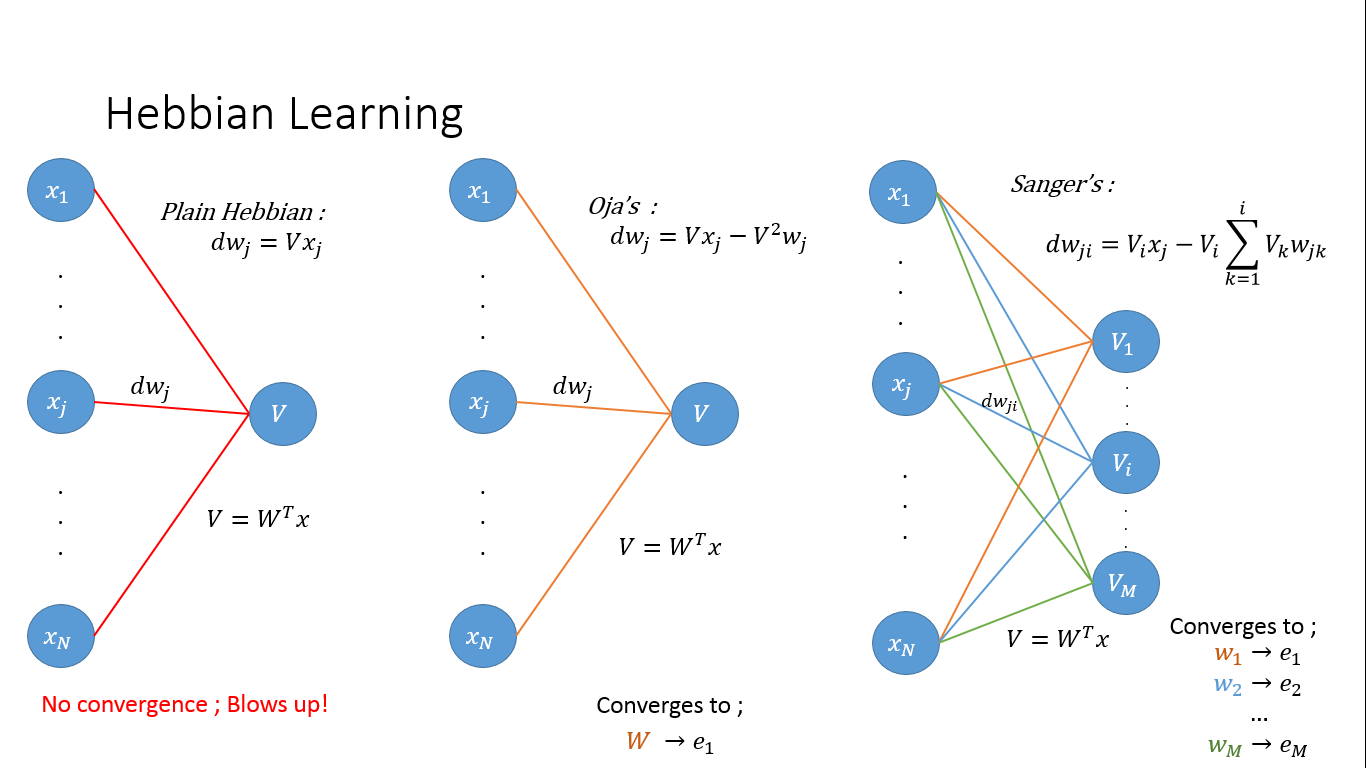

In [1]:
from IPython.display import Image
Image(filename='heb.png', width=600, height=600)

### 1.1. Plain Hebbian learning

Suppose the one-layer neural net of the image above, with $j=1..N$, and the update rule is : $dw_j = nVx_j$, based on the hebbian concept "those that fire together, wire together".

Then, 

$$\begin{equation*}
dw_j = nVx_j\\
= n(w^TX)x_j\\
= n\sum_{i=1}^N(w_ix_i)x_j\\
= n\sum_{i=1}^N(w_ic_{ij})\\
= nw^TC_j
\end{equation*}$$

, where 

- $c_{ij} = x_ix_j$ , the $ij$-th element of the outer-product matrix $C=XX^T$ , 
- $C_{j}$ the $j$-th row

, which in matrix form is $dw = nCw$.

Now, we seek the equilibrium point, where $dw_j$ will stop changing, for all $j$, therefore, the point $dw=0$, that is  $Cw=0$. This is a linear homogenous first order ODE, with $C$ positive semi-definite (eigenvalues $λ_1, λ_2, .., λ_N$ are all positive) and general solution is : $w= c_1u_1exp(λ_1t) + c_2u_2exp(λ_2t) + .. + c_Nu_Nexp(λ_Nt)$, where $c_j$ real number , $u_1, .., u_N$ the eigenvectors and $λ_1, .., λ_N$ their respective eigenvalues. Notice that, if $λ_j>0$, for all $j$, then $w_j$'s will always grow - never converge! So the problem with plain hebbian update rule is that weights blow up!

### 1.2. Oja's rule

Now, for the same one-layer network, we need an update rule that prevents weights $w_j$'s from blowing up. Oja chose to keep the weight norm $|w|=1$. Instead of re-normalizing at each update step, he achieved this with a new rule. How did he come up with this new rule? 

Think again of the simple case with one only output unit $V$.

- for plain hebbian rule : $\frac{\partial w}{\partial t} = Vx$ we have 
    
$$
\frac{\partial |w|^2}{\partial t} = 2 w^T \frac{\partial w}{\partial t} \\
= 2 w^T V x \\
= 2 w^T x V \\
= 2 VV \\
= 2 V^2 > 0
$$

- for Oja's rule : $\frac{\partial w}{\partial t} = V (x-Vw) $ we have

$$
\frac{\partial |w|^2}{\partial t} = 2 w^T \frac{\partial w}{\partial t} \\
= 2 w^T V (x-Vw) \\
= 2 (w^TxV - w^TwV^2) \\
= 2 (VV - V^2|w|^2) \\
= 2 V^2(1-|w|^2)
$$

which is not always $>0$ and for its equilibrium point : $1 - |w|^2 = 0$ which means $|w|=1$. 

Now, formally, the update rule is : $dw_j = n(Vx_j-V^2w_j)$. 

This leads to: 
$$\begin{equation*}
dw_j = n(\sum_{i=1}^N (w_ix_i)x_j - \sum_{i,k=1}^N (w_ix_iw_kx_k)w_j)\\
= n(\sum_{w_ic_{ij}} - \sum_{i,k=1}^N (w_ic_{ik}w_kw_j))\\
= n(C_jw - (w^TCw)w_j)
\end{equation*}$$

, which in matrix form becomes:  $$dw = n(Cw-(w^TCw)w)$$. 

So the equilibrium will be, as above stated, at $dw=0$, that is 
$$\begin{equation*}
Cw - (w^TCw)w = 0\\ 
Cw = (w^TCw)w\\
Cw = λw\\
\end{equation*}$$

, with $λ=w^TCw=w^Twλ=|w|^2λ$, which holds only for $|w|^2=1$, as we wanted.

So instead of the homogenous $Cw=0$, we end up with $Cw=λw$. Again, we shall examine stability. It has been shown$^{[2]}$ that the only stable solution for $w$ in this case, is for $w$ to converge to the eigenvector that corresponds to $λ_{max}$. 

So by updating weights with Oja's rule, we make the $w$ vector, converge to the first principal component vector $e_{1}=e_{max}$. 

What if we wanted to extract all principal components($e_{1}$, $e_{2}$, $..$)? Then we would need output $V$ to be a $Mx1$ vector instead of a real number and $w$ to be an $NxM$ matrix instead of a $Nx1$ vector. That leads us to Sanger' update rule.

### 1.3. Sanger's rule

Extend the case to $M$-many output units: 

$$\begin{equation*}
V = \begin{bmatrix} V_1\\ ..\\ V_M \end{bmatrix}
\end{equation*}$$

The update rule is:

$$\begin{equation*}
dw_{ji} = V_{i}x_{j} - V_{i}\sum_{k=1}^i V_{k}w_{jk} \\
= \sum_{p=1}^N w_{pi}x_{p}x_{j} - \sum_{p=1}^N w_{pi}x_{p} \sum_{k=1}^i \sum_{q=1}^N w_{qk}x_{q} w_{jk} \\
= \sum_{p=1}^N w_{pi}x_{p}x_{j} - \sum_{k=1}^i \sum_{p,q=1}^N w_{pi}x_{p}w_{qk}x_{q} w_{jk} \\
= \sum_{p=1}^N w_{pi}x_{p}x_{j} - \sum_{k=1}^i \sum_{p,q=1}^N w_{pi}x_{p}x_{q}w_{qk} w_{jk} \\
= \sum_{p=1}^N w_{pi}C_{pj} - \sum_{k=1}^i \sum_{p,q=1}^N w_{pi}C_{pq}w_{qk} w_{jk} \\
= \sum_{p=1}^N w_{pi}C_{pj} - \sum_{k=1}^i \sum_{p,q=1}^N w_{qk}C_{pq}w_{pi} w_{jk} \\
= C_{[j,:]}w_{[:,i]} -  \sum_{k=1}^i w_{[:,k]}^T C w_{[:,i]} w_{jk}
\end{equation*}$$

$$(1)$$

, which column-wise can be writen as:

$$\begin{equation*}
dw_{[:,i]} = Cw_{[:,i]} - \sum_{k=1}^i w_{[:,k]}^T C w_{[:,i]} w_{[:,k]} \\
= Cw_{[:,i]} - w_{[:,:i]} w_{[:,:i]}^T C w_{[:,i]} 
\end{equation*}$$

$$(2)$$

, and matrix-wise it is writen as:

$$\begin{equation*}
dw = Cw- w LT^T[w^TCw]
\end{equation*}$$

$$(3)$$

, where:

- input units: $x_j$ with $j=1..N$ 
- output units: $V_i$ with $i=1..M$, with $V = w^TX$ or $V_i =w_{:,i}^TX$
- $w$ the $NxM$ weight matrix,
- $dw$ the $NxM$ delta-weight matrix, 
- $dw_{:,i}$ the (N,1) column of delta-weights from output $V_{i}$ back to inputs $[x_1, x_2,.., x_N]$:

$$\begin{equation*}
dW = \begin{bmatrix} dw_{11} & .. & dw_{1M}\\  ..\\ dw_{N1} & .. & dw_{NM} \end{bmatrix} \\
= \begin{bmatrix} dw_{1} & .. & dw_{M} \end{bmatrix}
\end{equation*}$$

- $C$ is the $NxN$ autocorrelation matrix : 

$$\begin{equation*}
C = \begin{bmatrix} x_{1}^Tx_{1} & x_{1}^Tx_{2} & .. & x_{1}^Tx_{N}\\ ..\\ x_{N}^Tx_{1} & x_{N}^Tx_{2} & .. & x_{N}^Tx_{N} \end{bmatrix} \\
= \begin{bmatrix} x_{1}^2 & x_1x_2 & .. & x_1x_N\\ ..\\ x_{N}x_{1} & x_{N}x_{2} & .. & x_{N}^2 \end{bmatrix}
\end{equation*}$$

Let's see a simple example to understand how we went from $(2)$ to $(3)$. We have 

$$\begin{equation*}
dw_{[:,i]} = Cw_{[:,i]} - \sum_{k=1}^i w_{[:,k]}^T C w_{[:,i]} w_{[:,k]} \\
\end{equation*}$$ 

Then for a $(3,2)$ network we have: 

- i=1: 

$$dw_{[:,1]} = Cw_{[:,1]} - w_{[:,1]}^T C w_{[:,1]} w_{[:,1]} $$

which can also be writen as 

$$\begin{equation*}
dw_{[:,1]} = Cw_{[:,1]} - [(w_{[:,1]}^T C w_{[:,1]}) w_{[:,1]} + 0 w_{[:,2]} ]\\
= Cw_{[:,1]} - 
\begin{bmatrix} w_{[:,1]} & w_{[:,2]} \end{bmatrix}
\begin{bmatrix} w_{[:,1]}^T C w_{[:,1]} \\ 0 \end{bmatrix}
\end{equation*}$$

- i=2: 

$$\begin{equation*}
dw_{[:,2]} = Cw_{[:,2]} - [(w_{[:,1]}^T C w_{[:,1]}) w_{[:,1]} + (w_{[:,2]}^T C w_{[:,1]}) w_{[:,2]}] \\
= Cw_{[:,2]} - 
\begin{bmatrix} w_{[:,1]} & w_{[:,2]} \end{bmatrix}
\begin{bmatrix} w_{[:,2]}^T C w_{[:,1]} \\ w_{[:,2]}^T C w_{[:,2]}\end{bmatrix}
\end{equation*}$$

Overally the equation can be writen as:

$$\begin{equation*}
dw = \begin{bmatrix} dw_{[:,1]} & dw_{[:,2]} \end{bmatrix} \\
= C \begin{bmatrix} w_{[:,1]} & w_{[:,2]} \end{bmatrix} - \begin{bmatrix} w_{[:,1]} & w_{[:,2]}\end{bmatrix} \begin{bmatrix} w_{[:,1]}^TCw_{[:,1]} & w_{[:,2]}^TCw_{[:,1]} \\ 0 & w_{[:,2]}^TCw_{[:,2]} \end{bmatrix} \\
= Cw - w LT^T[VV^T] \\
= xx^Tw - w LT^T[VV^T] \\
= xV^T - w LT^T[VV^T]
\end{equation*}$$ 

$$(4)$$

, because

$$\begin{equation*}
VV^T = \begin{bmatrix} V_1^2 & V_1V_2 \\ V_2V_1 & V_2^2 \end{bmatrix} \\ 
= \begin{bmatrix} w_{[:,1]}^TCw_{[:,1]} & w_{[:,1]}^TCw_{[:,2]} \\ w_{[:,2]}^TCw_{[:,1]} & w_{[:,2]}^TCw_{[:,2]} \end{bmatrix}
\end{equation*}$$

and

$$ LT[VV^T] = \begin{bmatrix} w_{[:,1]}^TCw_{[:,1]} & 0 \\ w_{[:,2]}^TCw_{[:,1]} & w_{[:,2]}^TCw_{[:,2]} \end{bmatrix}$$



Compare the two rules

- Oja's: 
$$ \begin{equation*}
dw = Cw - (w^TCw)w\\
= Cw - w (w^TCw)
\end{equation*} $$

, we can swap them -$w$ and $(w^TCw)$-, because $(w^TCw)$ is just a real number $λ$

- Sanger's:
$$ \begin{equation*}
dw = Cw - w LT^T[w^TCw] \\   
\end{equation*} $$

### 1.4. Summary : How did we end up with GHA (in a nutshell)? 

- Plain Hebbian learning *blows up!*
- Oja's learning rule only learns the *first* principal component!
- So we will examine GHA, where all the weights converge to their respective eigenvectors *simultaneously*! 

### 2. Proof of convergence 


For $i=1$, Oja has proven that $w_{[:,1]}$ converges to $e_1$. We will show, by induction, that if $w_{[:,k]}$ has converged to $e_k$, for $k<i$, then also for $k=i$ it holds that $w_{[:,i]}$ will converge to $e_i$. And then this holds for every $i=1..M$: 

$$\begin{equation*}
\frac{\partial w_{[:,i]}}{\partial t} = C w_{[:,i]} - \sum_{k=1}^i w_{[:,k]}^T C w_{[:,i]} w_{[:,i]} \\ 
= C w_{[:,i]} - w_{[:,i]}^T C w_{[:,i]} - \sum_{k=1}^i w_{[:,k]} C w_{[:,i]} w_{[:,k]} \\ 
= C w_{[:,i]} - w_{[:,i]}^T C w_{[:,i]} - \sum_{k=1}^i e_k C w_{[:,i]} e_k 
\end{equation*}$$.
$$(6)$$

Suppose that for $k<i$, we already have : $w_{[:,k]} = e_k$, and now we examine the case for $k=i$. That is, $$ w_{:,i} = \sum_{k=1}^N a_k e_k \\ (7)$$, 

where 

- $N$ the # of inputs, and 
- $a_k = w_{[:,i]}^T e_k = e_k^T w_{[:,i]} (7')$.

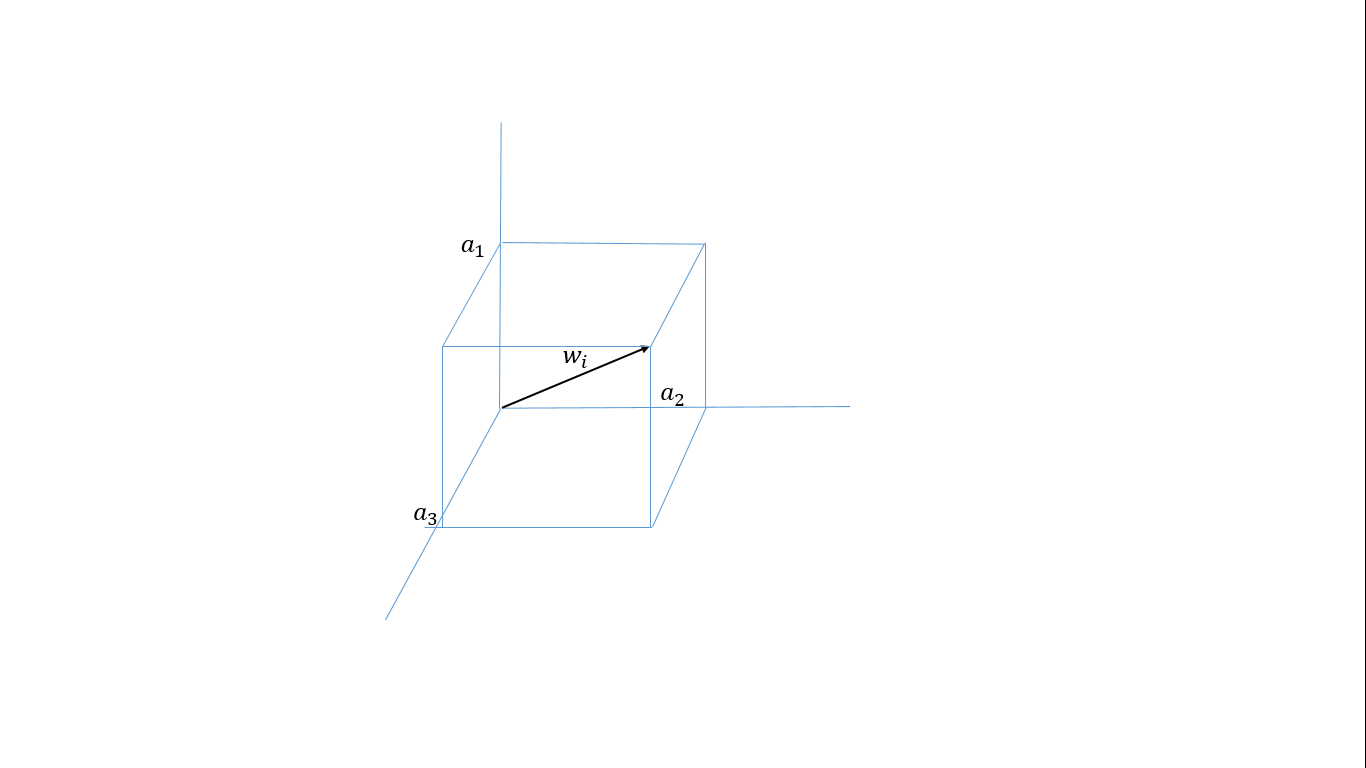

In [2]:
from IPython.display import Image
Image(filename='w_i.png', width=600, height=600)

then for the three terms of the equation $(6)$ we have:

- $1st$ term:

$$\begin{equation*}
C w_{[:,i]} = \begin{bmatrix} e_1 & .. & e_N \end{bmatrix} \begin{bmatrix} λ_1 & 0 & .. & 0 \\ 0 & λ_2 & 0 & .. & 0 \\ .. \\ 0 & .. & 0 & λ_Ν\\ \end{bmatrix} \begin{bmatrix} e_1^T \\ .. \\ e_N^T \end{bmatrix} w_{[:,i]} \\
= \begin{bmatrix} e_1 & .. & e_N \end{bmatrix} \begin{bmatrix} λ_1 & 0 & .. & 0 \\ 0 & λ_2 & 0 .. 0 \\ .. \\ 0 & .. & 0 & λ_Ν \end{bmatrix} \begin{bmatrix} e_1^T w_{[:,i]}\\ .. \\ e_N^T w_{[:,i]} \end{bmatrix} \\ 
= \sum_{k=1}^N e_k λ_k e_k^T w_{[:,i]} \\
= \sum_{k=1}^N e_k λ_k a_k \\
\end{equation*}$$

$$(8)$$

- $2nd$ term:

$$\begin{equation*}
w_{[:,i]}^T C w_{[:,i]} w_{[:,i]} = w_{[:,i]}^T \begin{bmatrix} e_1 & .. & e_N \end{bmatrix} \begin{bmatrix} λ_1 & 0 & .. & 0 \\ 0 & λ_2 & 0 & .. & 0 \\ .. \\ 0 & .. & 0 & λ_Ν \end{bmatrix} \begin{bmatrix} e_1^T \\ e_2 ^ T \\ ..\\ e_N^T \end{bmatrix} w_{[:,i]} w_{[:,i]} \\ 
= \begin{bmatrix} w_{[:,i]}^T e_1 & .. & w_{[:,i]}^T e_N \end{bmatrix} \begin{bmatrix} λ_1 & 0 & .. & 0 \\ 0 & λ_2 & 0& .. & 0 \\ .. \\ 0 & .. & 0 & λ_Ν \end{bmatrix} \begin{bmatrix} e_1^T w_{[:,i]}\\ e_2 ^ T w_{[:,i]}\\ ..\\ e_N^T w_{[:,i]} \end{bmatrix} w_{[:,i]} \\
= \begin{bmatrix} a_1 & a_2 & .. & a_N \end{bmatrix} \begin{bmatrix} λ_1 & 0 & .. & 0 \\ 0 & λ_2 & 0& .. & 0 \\ .. \\ 0 & .. & 0 & λ_Ν \end{bmatrix} \begin{bmatrix} a_1 \\ a_2 \\ .. \\ a_N \end{bmatrix} w_{[:,i]} \\
= w_{[:,i]} \begin{bmatrix} a_1 & a_2 & .. & a_N \end{bmatrix} \begin{bmatrix} λ_1 & 0 & .. & 0 \\ 0 & λ_2 & 0& .. & 0 \\ .. \\ 0 & .. & 0 & λ_Ν \end{bmatrix} \begin{bmatrix} a_1 \\ a_2 \\ .. \\ a_N \end{bmatrix} \\
= \sum_{k=1}^N a_k e_k \sum_{j=1}^N a_j λ_j a_j \\
= \sum_{k=1}^N a_k e_k \sum_{j=1}^N a_j^2 λ_j \\
\end{equation*}$$

$$(9)$$

- $3rd$ term: 

$$\begin{equation*}
\sum_{k<i} e_k^T C w_{[:,i]} e_k = \sum_{k<i} e_k^T \begin{bmatrix} e_1 & .. & e_k & .. & e_N \end{bmatrix} \begin{bmatrix} λ_1 & 0 & .. & 0 \\ 0 & λ_2 &.. & 0 \\ .. \\ 0 & .. & 0 & λ_Ν \end{bmatrix} \begin{bmatrix} e_1^T\\ e_2^T \\ ..\\ e_N^T \end{bmatrix} w_{[:,i]}  e_k \\
= \sum_{k<i} \begin{bmatrix} e_k^T e_1 & .. & e_k^T e_k & .. & e_k^T e_N \end{bmatrix} \begin{bmatrix} λ_1 & 0 & .. & 0 \\ 0 & λ_2 & .. & 0 \\ .. \\ 0 & .. & 0 & λ_Ν \end{bmatrix} \begin{bmatrix} e_1^T w_{[:,i]} \\ e_2^T w_{[:,i]} \\ .. \\ e_N^T w_{[:,i]} \end{bmatrix} e_k \\
= \sum_{k<i}  \begin{bmatrix} 0  & .. & e_k^T e_k & .. & 0 \end{bmatrix} \begin{bmatrix} λ_1 & 0 & .. & 0 \\ 0 & λ_2 & .. & 0 \\ .. \\ 0 & .. & 0 & λ_Ν \end{bmatrix} \begin{bmatrix} a_1 \\ a_2 \\  .. \\ a_N \end{bmatrix} e_k \\
= \sum_{k<i}  \begin{bmatrix} 0  & .. & 1 & .. & 0 \end{bmatrix} \begin{bmatrix} λ_1 & 0 & .. & 0 \\ 0 & λ_2 & .. & 0 \\ .. \\ 0 & .. & 0 & λ_Ν \end{bmatrix} \begin{bmatrix} a_1 \\ a_2 \\ .. \\ a_N \end{bmatrix} e_k \\
= \sum_{k<i} λ_k a_k e_k
\end{equation*}$$.

$$(10)$$

Then by $(8),(9),(10)$ the equation $(6)$ becomes : 

$$ 
\sum_{k=1}^N e_k λ_k a_k - \sum_{k=1}^N a_k e_k \sum_{j=1}^N a_j^2 λ_j -  \sum_{k<i} λ_k a_k e_k \\
= [\sum_{k=1}^N e_k λ_k a_k - \sum_{k<i} λ_k a_k e_k ] - \sum_{k=1}^N a_k e_k \sum_{j=1}^N a_j^2 λ_j \\ 
= [\sum_{k>=i} λ_k a_k e_k] - \sum_{k=1}^N a_k e_k \sum_{j=1}^N a_j^2 λ_j \\
= \sum_{k>=i} λ_k a_k e_k - [\sum_{k<i} a_k e_k \sum_{j=1}^N λ_j a_j^2 + \sum_{k>=i} a_k e_k \sum_{j=1}^N λ_j a_j^2] \\
= -\sum_{k<i} a_k e_k \sum_{j=1}^N λ_j a_j^2 + \sum_{k>=i} (λ_k - \sum_{j=1}^N λ_j a_j^2) a_k e_k
$$

, that is :

- for $k<i$ : $\frac{\partial w_{[:,i]}}{\partial t} = -\sum_{j=1}^N λ_j a_j^2 a_k = - a_k\sum_{j=1}^N λ_j a_j^2 $
- for $k>i$ : $\frac{\partial w_{[:,i]}}{\partial t} = a_k (λ_k - \sum_{j=1}^N λ_j a_j^2) $.

But also notice that if we differentiate equation $(7')$ then we get $\frac{\partial w_{[:,i]}}{\partial t}= \sum_{k=1}^N \frac{\partial a_k}{\partial t} e_k$. Therefore $\frac{\partial w_{[:,i]}}{\partial t}$ is proportional to $\frac{\partial a_k}{\partial t}$, for every $k=1..N$. Then :

- for $k<i$ : $\frac{\partial a_k}{\partial t} = -\sum_{j=1}^N λ_j a_j^2 a_k = - a_k\sum_{j=1}^N λ_j a_j^2 = -a_k  (smthing>0)$. This means that $a_k$ converges to $0$. 

- for $k>i$ we set : $θ_k = \frac{a_k}{a_i}$. Then 
$$
\frac{\partial θ_k}{\partial t} 
= \frac{a_k' a_i - a_k a_i'}{a_i^2}
= \frac{a_k'}{a_i} - \frac{a_k}{a_i} \frac{a_i'}{a_i} 
= \frac{1}{a_i} (a_k' - θ_k a_i') \\
= \frac{1}{a_i} ((λ_k - \sum_{i=1}^N λ_i a_i^2) a_k  - θ_k (λ_i - \sum_{i=1}^N λ_i a_i^2) a_i) \\
= θ_k (λ_k - \sum_{i=1}^N λ_i a_i^2) - θ_k (λ_i - \sum_{i=1}^N λ_i a_i^2) \\
= θ_k (λ_k - λ_i)
$$ 

We examine the case $k>i$. So $λ_k < λ_i$, since they are eigenvalues in descending order and $k>i$. Therefore $ θ_k' = θ_k (λ_k - λ_i) = θ_k (smthing <0) $. This means that $θ_k$ converges to $0$.

- for $k=i$ : 
$$
a_i' = a_i (λ_i - \sum_{k=1}^N λ_k a_k^2) \\
= a_i (λ_i - λ_i a_i^2 - \sum_{k=1..N - {{i}}} λ_k a_k^2 ) \\
= a_i (λ_i - λ_i a_i^2 - \sum_{k<i} λ_k a_k^2 - \sum_{k>i} λ_k a_k^2 ) \\
= a_i (λ_i - λ_i a_i^2 - \sum_{k<i} λ_k a_k^2 - a_i^2 \sum_{k>i} λ_k θ_k^2 )) \\ (11)
$$

We proved above, that 
- for $k<i$ : $a_k$ converges to $0$ and 
- for $k>i$: $θ_k$ converges to $0$. 

Then the expression $(11)$ becomes :  $ a_i (λ_i - λ_i a_i^2) = λ_i (a_i - a_i^3) = λ_i a_i (1-a_i) (1+a_i) $ , which has minimum at $a_i = +1 / -1$. 

Then from equation $(7)$ we see that $w_{:,i}$ converges to $+e_i / -e_i$, respectively, because $a_i$ is the only non-trivial value of  $a_k$, for $k=[1..N]-[i]$ : $a = [a_1, .., a_i, .., a_N] = [0 , .., a_i, .., 0] = [0 , .., +/-1, .., 0]$.

$$ w_{[:,i]} = \sum_{k=1}^N a_k e_k = \sum_{k=1..N - [i]} a_k e_k + a_i e_i = a_i e_i $$

### 3. Proof of optimality

Suppose reconstruction of input : $\hat{x} = Ay + b$ and $E[\hat x] = E[x]$.

Then $b = \tilde{x} - A\tilde{y}$.

Then $\hat x = Ay + \tilde{x} - A\tilde{y} = A (y - \tilde y) + \tilde x$ -> $\hat x - x = A (y - \tilde y) - (x - \tilde x)$. 

Then $E[(\hat x - x)(y - \tilde y)^T] = E[(A(y - \tilde y) - (x-\tilde x)(y - \tilde y)^T)] \\
= A E[(y - \tilde y)(y - \tilde y)^T)] - E[(x - \tilde x)(y - \tilde y)^T] \\
= A YY^T - XY^T $.

From orthogonality principle we know that $\hat x - x$ is orthogonal to $y - \tilde y$. Then the above means : 
$E[(\hat x - x)(y - \tilde y)^T] = 0$ -> $A YY^T - XY = 0$ -> $A = (XY) (YY^T)^{-1}$.

Then $\hat x = ((XY^T) - (YY^T)^{-1}) (y - \tilde y) + \tilde x$.

We will show that MSE goes to $0$.

$$
MSE = E[(\hat x - x)(\hat x - x)^T] \\
= E[(\hat x - x)(A (y - \tilde y) + \tilde x - x)^T] \\
= E[(\hat x - x)(A (y - \tilde y) - (x - \tilde x)^T] \\
= A E[(\hat x - x)(y - \tilde y)^T] - E[(\hat x - x)(x - \tilde x)^T] \\
= -E[(\hat x - x)(x - \tilde x)^T] \\
= -E[(A(y - \tilde y) - (x - \tilde x))(x - \tilde x)^T] \\
= -A E[(y - \tilde y)(x - \tilde x)^T] + E[(x - \tilde x)(x - \tilde x)^T] \\
= -(XY^T) (YY^T)^{-1} (YX^T) + XX^T 
$$

By Sanger's updating rule we have that the rows of $W$ span the $first-M$ eigenspace : 

- $WW^T = I$
- $XX^T = WΛW^T$

Then $MSE$ becomes : 

$$
-(XY^T) (YY^T)^{-1} (YX^T) + XX^T = -(X X^TW) (W^TX X^TW)^{-1} W^TX X^T + WΛW^T\\
= - XX^TW(W^TWΛW^TW)^{-1} W^TXX^T + ..\\ 
= - XX^TW(IΛI)^{-1}W^TXX^T + ..\\
= -WΛW^TW(Λ)^{-1}W^TWΛW^T + ..\\
= -WΛΙΛ^{-1}ΙΛW^T + ..\\
= -WΛW^T + WΛW^T \\
= 0
$$

### 4. Properties of the GHA algorithm

- Parallel convergence of weights to eigenvectors - Maximization of output variance - Outputs are uncorrelated
- Optimality in reconstructing the input
- Biologically plausible learning - Local opertations
- Time complexity ~ # of output units
- Comparison with other algortihms
    - "Affordable PCA" vs PCA
    - "Strictly descending order of the eigenvalues" vs Winner-takes-all network
    - "Finds first M eigenvectors" vs SSBP's

Convergence and Optimality have been discussed already.

### Locality

Notice that we can write (1) as

$$ \begin{equation*}
dw_{ji} = V_{i}x_{j} - V_i \sum_{k=1}^i V_{k} w_{jk} \\
= V_i (x_{j} - \sum_{k=1}^{i-1} V_{k} w_{jk}) - V_i^2 w_{ji}\\ 
\end{equation*} (5)$$

##### Intuition: 

- Notice the similarity with Oja's rule: $dw_{ji} = V_ix_{j} - V_i^2 w_{ji}$. It's like applying the Oja's rule, to each output unit $V_i$, using a *modified input*. The *modified input* : $x_{j} - \sum_{k=1}^{i-1} V_{k} w_{jk}$,  instead of $x_j$ , trains output $i$  and is  formed by subtracting the components  $w_{jk}$, which contributed to the previous outputs  $V_k$, for $k<i$. If the first  $i-1$ outputs correspond to the first  $i-1$ eigenvectors, then the $i$-th output "sees" a *deflated* input, from which those eigenvectors have been removed, and the $i$-th output $V_i$ is forced to extract the $i$-th principal component. Anothter way to look at it is the following. The expression $dw_{[j,i]} = V_i x_j - \sum_{k=1}^{i} V_k w_{jk}$ is equivalent to $ dw_{[:,i]} = V_i x - V_i w_{[:,:i]} V_{:i}$, which has equilibrium at $x = w_{[:,:i]} V_{:i}$. This is like trying to minimize reconstruction error of the input $x$, by using for each output unit $V_i$, only the current output unit $V_i$ and the previous output units $V_1, .., V_{i-1}$. For example:

    - for $i=1$: output unit $V_1$ pushes $w_{[:,1]}$ to satisfy : $\hat{x} = w_{[:,1]}V_{1}$, which is like trying to reconstruct the input $x$, using only the $w_{[:,1]}$, i.e. the $1st$ principal component only.
    - for $i=2$: output unit $V_2$ pushes $w_{[:,2]}$ to satisfy: $\hat{x} = w_{[:,1:2]}V_{1:2}$, which is like trying to reconstruct the input $x$, using only $w_{[:,1]}$ and $w_{[:,2]}$ , i.e. $1st$ and $2nd$ principal component only.
    - for $i=3$: output unit $V_3$ pushes $w_{[:,3]}$ to satisfy: $\hat{x} = w_{[:,1:3]}V_{1:3}$, which is like trying to reconstruct the input $x$, using only $w_{[:,1]}$, $w_{[:,2]}$, $w_{[:,3]}$ , i.e. the $1st$, $2nd$ and $3rd$ principal components only.
    - ...
    - for $i=M$ : output unit $V_M$ pushes $w_{[:,M]}$ to satisfy: $\hat{x} = w_{[:,1:M]}V_{1:M} = w V$, which is like trying to reconstruct the input $x$, using the $1st$, $2nd$ .. $Mth$ principal components.
    
##### Local operations: 

Equation (5) and the figure below show that the learning rule can be implemented using only local operations. Notice we subtract the components $V_k w_{jk}$ as we go. This corresponds to "using up" some of the input "energy"  as  we  train each of the outputs. A local synapse-like structure which can perform this operation  is  shown in the figure below (we only see the case for $j=1$. The same applies to all the other $j=2..N$).

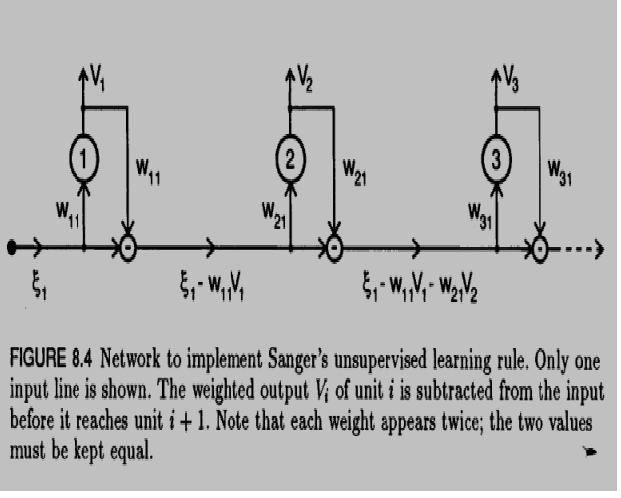

In [3]:
Image(filename='local.png', width=600, height=400)

### Time complexity
    
- We achieve simulatenous convergence for all the weights. 
- The number of outputs increases the time. 
- Modification of input effectively decreases the variance of the input used to train higher-numbered outputs (large $i$). Decreasing the variance of the input  is mathematically equivalent to decreasing  learning rate,  so  we  expect that the learning rate should decrease for the later outputs. 
- In practice training time is roughly proportional to the number of outputs.  

### GHA vs other algorithms
### a. "Affordable PCA" vs. PCA

PCA

- Time complexity: 
    - Covariance matrix $XX^T$ : $O(p^2$$n)$,
    - its SVD is $O(p^3)$, 
    - so overally, the PCA-complexity is :  $O(p^2$$n$+$p^3)$,
- Needs to compute $XX^T$ and *store* it (storage problem),
- Finds with high accuracy *all* the eigenvectors.

, where $n$: # of data points and $p$: # of features.

GHA

- Time complexity : 
    - ~ $10^4$ epochs to converge, in CPU time, which depends on the # of output units.
- Only needs to compute $YX^T$ and $YY^T$ - avoids the storage of $XX^T$,
- Finds the $M$ first eigenvectors (*we* choose $M$).

example. 

- Say, $X$ is $(p,n)$ , with p=4000. 
- Then $XX^T$ is $4000, 4000$, that is $16 * 10^6 $ elements (storage!).
- But if we choose to find only the first $M$ eigenvectors with the GHA, then $YX^T$ is $4000,M$ and $YY^T$ is $M ,M$. A rational choice for $M$ would be $16$. Then the respective elements will be, $4000*16=64000$ and $16*16=256$.

Conclusion

- PCA : 
    - Storage problem
    - High accuracy of *all* the eigenvectors 
    - Calculation of *all* the eigenvectors (exhaustive computation). 
- GHA : 
    - No storage problem
    - Modest accuracy, for all but the first few eigenvectors
    - Calculation of the first $M$ eigenvectors (not exhaustive computation).

### b. "Strictly descending order" vs. Winner-takes-all network

- Winner-take-all networks : each output unit $V_i$, finds the eigenvector of a different subset of inputs (the subset of inputs for which this output unit "wins").
- GHA : 1st output finds 1st eigenvector, 2nd output finds 2nd eigenvector and so on ...

### c. "Finds first M eigenvectors" vs. Self Supervised Backpropagation

- SSBP network :
    - Weights converge to local optimum (depends on initialization of weights).
    - Finds linear combination of the first M eigenvectors.
- GHA :
    - Weights converege to global optimum (doesn't depend on initialization).
    - Finds the first M eigennvectors in descending order.

### 5. Comparison with PCA.

Now, let's see a toy-example where we build a (3,2) network, train it with Sanger's  rule, and compare the trained weights with the principal components...

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax  
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [5]:
#Image(filename='rule.jpg', width=500, height=700) 
# if you want to open it, in new window...
#from PIL import Image
#jpgfile = Image.open("sxedio.jpg")
#jpgfile.show()

First let's generate some data to work on..

In [6]:
def generate_random(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

def two_three_d_blobs(n):
    '''
    Generate 2 blobs, of n 3d data points each, then plot them.
    '''
    
    # initialize data list
    data = []
    data_C = []
    data_eigenvals = []
    data_eigenvecs = [] 
    
    # configure 3d plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    # define the scaler to make our data zero-mean.
    scaler = StandardScaler(with_std=False)
    
    # generate the 2 blobs 
    for c, m, vmin, vmax, i in [('r', 'o', np.random.uniform(1,10), np.random.uniform(1,10), 0)]:#, 
                                #('b', '^', np.random.uniform(1,10), np.random.uniform(1,10), 1)]:
        
        # step.1. generate the features-axis of the data points.
        x1 = generate_random(n, vmin, vmax)
        x2 = generate_random(n, vmin, vmax)
        x3 = generate_random(n, vmin, vmax)
        # keep blob (which is an array (n,3)) in a list called data.
        x = np.vstack((x1,x2,x3)).T # [x1;x2;x3].T -> (50,3)
        x_scaled = scaler.fit_transform(x) 
        # keep blob data separately 
        data.append(x_scaled) # 1st pass [(50,3)], 2nd pass [(50,3), (50,3)]
        # plot the data points
        ax.scatter(x_scaled[:,0], 
                   x_scaled[:,1], 
                   x_scaled[:,2], 
                   c=c, marker=m)
        
        # step.2. SVD
        C = np.cov(x_scaled.T) # (3,50)dot(50,3)=(3,3)
        eigenvals, eigenvecs = np.linalg.eig(C) # eval[i] corresponds to evec[:,i]
        # keep blob data separetely
        data_C.append(C)
        data_eigenvals.append(eigenvals)
        data_eigenvecs.append(eigenvecs)
        # plot the eigenvecs
        for i in range(len(eigenvecs)):
            x1axis = [0]
            x2axis = [0]
            x3axis = [0]
            x1axis.append(eigenvecs[0,i])
            x2axis.append(eigenvecs[1,i])
            x3axis.append(eigenvecs[2,i])
            ax.plot(x1axis, 
                    x2axis, 
                    x3axis, 
                    c = c) # 3 eigenvectors for the 1st -red- blob and 3 for the 2nd -blue- blob
    
    # set labels 
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')

    plt.show()
    
    return data, data_eigenvals, data_eigenvecs, data_C

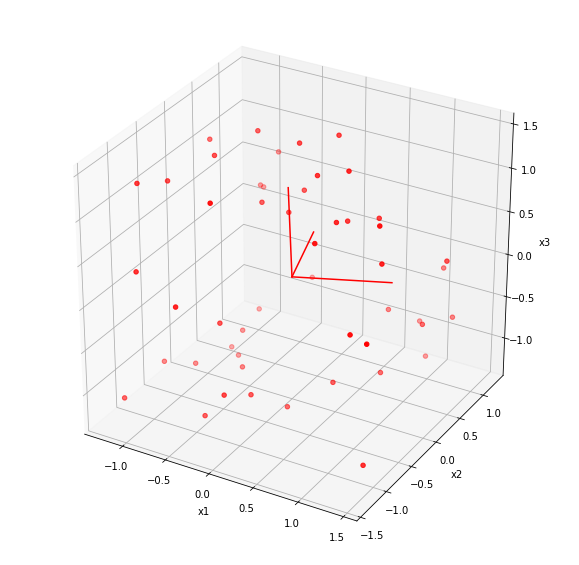

In [7]:
np.random.seed(1)

# let's create 2 blobs, each with 50 data points.
data, eigenvals, eigenvecs, C = two_three_d_blobs(50)

Notice the 2 blobs (red and blue), the 3 eigenvectors for each blob.

In [8]:
# my first 5 data points of the first blob
print ('1st blob:\n', data[0][:5])
print (data[0].shape)
# and of the second blob
#print ('2nd blob:\n', data[1][:5])
#print (data[0].shape)

1st blob:
 [[-1.25042672 -0.80871343  1.12176846]
 [-0.42545493 -0.66153077 -0.32136027]
 [-0.85013609 -0.04454117  1.18344121]
 [-0.9986802  -1.2407345   0.40499253]
 [-0.74230026  0.18078225 -1.25341994]]
(50, 3)


In [9]:
# check that my data in indeed scaled to zero-mean.
#print (np.mean(data[1][:,0]))
#print (np.mean(data[1][:,1]))
#print (np.mean(data[1][:,2]))
print (np.mean(data[0][:,0]))
print (np.mean(data[0][:,1]))
print (np.mean(data[0][:,2]))

8.526512829121202e-16
-9.592326932761353e-16
2.486899575160351e-16


Ok. Both blobs are centered around (0,0,0).

In [10]:
# correlation matrix is the result of (3,50) dot (50,3) -> (3,3), one for each blob
C

[array([[ 0.73517259,  0.0609775 , -0.00997442],
        [ 0.0609775 ,  0.56836677,  0.01040937],
        [-0.00997442,  0.01040937,  0.89351894]])]

In [11]:
# one eigenvals-vector for each blob
eigenvals

[array([0.54796447, 0.75480622, 0.89428761])]

In [12]:
# one eigenvecs array for each blob
eigenvecs

[array([[-0.31129679,  0.94876297, -0.05425066],
        [ 0.949569  ,  0.31280401,  0.02173382],
        [-0.03759007,  0.04474908,  0.99829079]])]

We will only practice Sanger's on the FIRST blob.

In [13]:
C = C[0]
eigenvecs = eigenvecs[0]
eigenvals = eigenvals[0]

In [14]:
# principal component
index = np.argmax(eigenvals, axis=0)
pc = eigenvecs[:,index]
pc

array([-0.05425066,  0.02173382,  0.99829079])

We expect weights to converge to the two first principal components. The first is shown above.

We will implement the (3,2) network s.t. 

- input is

$$\mathbf{X} = 
\begin{bmatrix}
X_{1} \\
X_{2} \\
X_{3} \\
\end{bmatrix}
$$

- weights are: 

$$\mathbf{W} = 
\begin{bmatrix} 
w_{11} & w_{21} \\ 
w_{12} & w_{22} \\ 
w_{13} & w_{23} \\
\end{bmatrix}
$$

, where  $w_{ij}$ the weight from $j$ -> $i$

- output is 

$$\mathbf{V} = 
\begin{bmatrix}
V_{1} \\
V_{2} \\
\end{bmatrix}
$$

, with  $V = w^T X$

- $dw_{i}$ the (3,1) column of weights from all the inputs $[X_{1}, X_{2}, X_{3}]$ to the output $V_{i}$

$$\begin{equation*}
dW =  \begin{bmatrix}  dw_{11} & dw_{21} \\ dw_{12} & dw_{22} \\ dw_{13} & dw_{23} \end{bmatrix} \\
= \begin{bmatrix} dw_{1} & dw_{2} \end{bmatrix}
\end{equation*}$$

- $C$ is the matrix : 

$$\begin{equation*}
C =  \begin{bmatrix} x_{1}^2 & x_{1}^Tx_{2} & x_{1}^Tx_{3}\\ x_{2}^Tx_{1} & x_{2}^2 & x_{2}^Tx_{3}\\ x_{3}^Tx_{1} & x_{3}^Tx_{2} & x_{3}^2 \end{bmatrix}
\end{equation*}$$

- $V_{i}$ , where $i = 1,2$ (the real number output units) and 
- $X_{j}$, where $j=1..3$ (the (50,1) input units).

Then we have: 

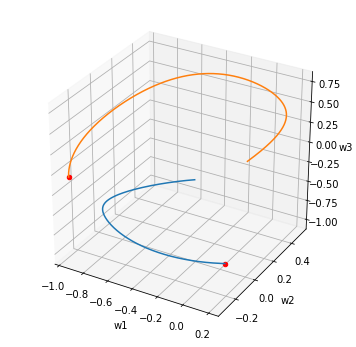

In [15]:
# Sanger's rule

# make results repeatable
np.random.seed(1000) 

# initialize randomly the weights, w. Here i'm planning my weights 
# s.t. i am creating a 3-input, 2-output net. 
w = np.random.normal(scale=0.25, size=(3,2))

# Set the threshold of tolerance, close to 0.
# This will be the flag point to end the loop,
# when the difference between new and the previous
# weights is almost zero. Then, we need also to 
# initialize the weights we will keep as flag, w_prev.
threshold = 1e-8
w_prev = np.ones((3,2))

# update rule
learning_rate = 0.001
listw1 = [[] for i in range(2)]
listw2 = [[] for i in range(2)]
listw3 = [[] for i in range(2)]
while np.linalg.norm(w - w_prev) > threshold:
    w_prev = w.copy()
    for i in range(2): # 2 output units
        rule = np.dot(C, w[:,i]) - np.dot(w[:,:i+1], np.dot(w[:,:i+1].T, np.dot(C, w[:,i])))
        # 3,3 dot 3,1 - 3,k dot (k,3 dot (3,3 dot 3,1))
        w[:,i] += learning_rate * rule # 3,1 = 3,1
        # keep a list of the w1,w2,w3 axis to plot next, that is 
        # the convergence of the sanger weights that correspond to the first 
        # output unit - w[:,0] - , to the principal component.    
        listw1[i].append(w_prev[0,i])
        listw2[i].append(w_prev[1,i])
        listw3[i].append(w_prev[2,i])
    
# append the last w_oja point to my lists
# first output weights
listw1[0].append(w[0,0])
listw2[0].append(w[1,0])
listw3[0].append(w[2,0])
# second output weights
listw1[1].append(w[0,1])
listw2[1].append(w[1,1])
listw3[1].append(w[2,1])

# plot  the first two eigenvecs, and the evolution of the weights into them.
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(listw1[0], listw2[0], listw3[0]) # W1 = [w11, w12, w13]
ax.plot(listw1[1], listw2[1], listw3[1]) # W2 = [w21, w22, w23]

ax.scatter(-pc[0], -pc[1], -pc[2], color='r')
ax.scatter(-eigenvecs[0,1], -eigenvecs[1,1], -eigenvecs[2,1], color='r')


ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('w3')

plt.show()

Notice how the weights corresponding to the first output $V_{1}$ (in python, the `w[:,0]`) converge to the principal component and the weight corresponding to the second output $V_{2}$ `(w[:,1]`) converges to the second largest component !!! Well in fact they converge to their negative vectors, which translates however into the same thing..

In [16]:
print ('w: \n', w)
print ('eigenvetors: \n', eigenvecs)

w: 
 [[ 0.05420769 -0.94876601]
 [-0.02174799 -0.31280272]
 [-0.99829282 -0.04469362]]
eigenvetors: 
 [[-0.31129679  0.94876297 -0.05425066]
 [ 0.949569    0.31280401  0.02173382]
 [-0.03759007  0.04474908  0.99829079]]


### 6. Some applications.

### 6.1. Image coding

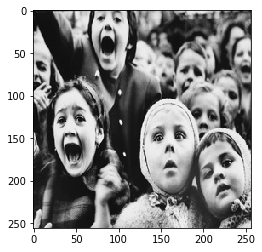

In [17]:
from PIL import Image
img = Image.open('eisenstaedt.jpg').convert('L') # open and convert to greycale
img = img.resize((256, 256), Image.ANTIALIAS) # resize into 256x256
plt.imshow(img, cmap='gray') # show
plt.show()

imgarr = np.asarray(img) # read image into array

In [18]:
print(imgarr.shape)
print(imgarr)

(256, 256)
[[ 28  27  26 ...  69  47  34]
 [ 29  26  29 ...  63  50  36]
 [ 25  24  25 ...  66  61  46]
 ...
 [169 202 192 ... 202 202 189]
 [189 201 192 ... 202 195 192]
 [198 199 190 ... 199 199 206]]


### What's the plan.

6.1.1. (Step.1.) Train the network.

We will take $1024$ non-overlapping blocks $I_{n:n+8, m:m+8}$, $(8,8)$ or equivalently $(64,1)$ each, where $m,n=0, 7, 15, 23, ..$ and define the training set $X_{64,1024}$ and train $w_{64,8}$ on this set. Each $w_{:,i}$, where $i=1..8$, is a principal component of the input covariance matrix $XX^T$.

6.1.2. (Step.2.) Reconstruct the image, using the learned $w$.

6.1.3. Check what each trained $w_{:,i}$ represents a global feature, by encoding and decoding a different image, with the those same trained weights.

### 6.1.1. (Step.1.) Let's build the GHA model, that trains the weights.

The update rule is the equation $(3)$

$$ dw = Cw - w LT^T[w^TCw] $$

where $C = \frac{1}{2048-1} x x^T$. But now we prefer to avoid the $C$ calculation, so we use $ Y = w^T x$, to modify the expression

$$ dw = \frac{1}{2048-1} x x^T w - w LT^T[\frac{1}{2048-1} w^Txx^Tw] \\
= \frac{1}{2048-1} xY^T - w LT^T[\frac{1}{2048-1} YY^T] $$ 

which is explicitly

$$\begin{equation*}
\begin{bmatrix} dw_{:,1} & dw_{:,2} & .. & dw_{:,8} \end{bmatrix} \\
= \frac{1}{2048-1} \begin{bmatrix} x_{1,:}Y_{1,:}^T & x_{1,:}Y_{2,:}^T & .. & x_{1,:}Y_{8,:}^T \\ ..\\ x_{64,:}Y_{1,:}^T & x_{64,:}Y_{2,:}^T & .. & x_{64,:}Y_{8,:}^T \end{bmatrix} - \frac{1}{2048-1} \begin{bmatrix} w_{:,1} & w_{:,2} & .. & w_{:,8} \end{bmatrix} \begin{bmatrix}  Y_{1,:}Y_{1,:}^T & Y_{1,:}Y_{2,:}^T & .. & Y_{1,:}Y_{8,:}^T \\ 0 & Y_{2,:}Y_{2,:}^T & .. & Y_{2,:}Y_{8,:}^T \\  ..\\ 0 & 0 & .. & Y_{8,:}Y_{8,:}^T \end{bmatrix}
\end{equation*}$$

which is in accordance with the initial update rule, if we revisit it: $dw_{ji} = Y_{i}x_{j} - Y_{i}\sum_{k=1}^i Y_{k}w_{jk}$. Observe that for many training examples the expression formally is

$$\begin{equation*}
dw_{ji} = x_{j,:}Y_{i,:}^T - \sum_{k=1}^i w_{jk}Y_{k,:} Y_{i,:}^T 
\end{equation*}$$

and for each $i$

$$\begin{equation*}
dw_{:,i} = x Y_{i,:}^T - \sum_{k=1}^i w_{:,k} Y_{k,:} Y_{i,:}^T \\
= x Y_{i,:}^T - w LT^T [YY^T]_{:,i} 
\end{equation*}$$

$$(5)$$

and overally we get the equation $(4)$

$$ dw = xY^T - w LT^T[YY^T] $$

In [21]:
def X_fromImage(imgarr):
    
    "Construct the X input (64,1024), using the 1024 non-overlapping 8-by-8 or 64-by-1 blocks"
    
    # Sample the non-overlapping 256/8*256/8 = 1024 (8,8) -> (64,1) blocks on the image-array 'imgarr'.
    # That is, to create the X (input) array (8,8,1024) -> (64,1024).
    X = np.empty((64,1))
    for i in range(int((imgarr.shape[0]/8))):
        for j in range(int((imgarr.shape[1]/8))):
            X = np.hstack((X, imgarr[i*8:(i+1)*8, j*8:(j+1)*8].reshape(64,1)))
    
    # Get rid of the first empty column and then double the rest of the sample-array, 
    # to create double number of examples -equivalent of double passing the image array-.
    X = X[:,1:] # (64,1024)
    X = np.hstack((X, X)) # (64,2048)
    
    # Make X zero-mean, for each one of the 64 features (row-wise).
    X_mean = np.mean(X, axis=1)
    X = X - X_mean.reshape((X.shape[0],1))
    
    return X, X_mean

In [22]:
def GHA(X, learning_rate = 0.1, threshold = 1e-8, num_outputs = 8):
    
    "Train weights, using the update  rule on X"
    
    # Declare the parameters of the input.
    num_inputs = X.shape[0] # 64
    num_samples = X.shape[1] # 2048
    
    # Intialize (64,8) weights and time t.
    W = np.random.normal(scale=.5, size=(num_inputs, num_outputs))
    W_prev = np.random.normal(scale=.25, size=(num_inputs, num_outputs))
    difference_trace = []
    t_trace = []
    t = 0
    
    # update rule - choose either alt.1.a/b/c or alt.2., they do the same thing.
    
    # alt.1. 'dwi' 
    #while np.linalg.norm(W - W_prev) > threshold: # works with 64,8
    #    t += 1.0
    #    W_prev = W.copy()
    #    for i in range(8): # 8 output units
    #        
    #        # alt.a. eqtn (2) with calculation of matrix C
    #        #dWi = np.dot(C, W[:,i]) - np.dot(W[:,:i+1], np.dot(W[:,:i+1].T, np.dot(C, W[:,i])))
    #        
    #        # alt.b. eqtn (5)
    #        Y = np.dot(W.T, X) # 8,2048
    #        XYi = np.dot(X, Y[i,:].T) # 64,2048 * 2048,1 -> 64,1
    #        LTT = np.tril(np.dot(Y,Y.T)).T # 8,8
    #        dWi =  1/(num_samples-1) * (XYi - np.dot(W, LTT[:,i])) #  64,1 - 64,8*8,1
    #        
    #        # alt.c. eqtn (2) without calculation of matrix C
    #        #Yi = np.dot(W[:,i].T, X) # 1,64 * 64,2048 -> 1,2048
    #        #XYi = np.dot(X, Yi.T) # 64,2048 * 2048,1 -> 64,1
    #        #dWi =  1/(num_samples-1) * (XYi - np.dot(W[:,:i+1], np.dot(W[:,:i+1].T, np.dot(X, Yi.T))))
    #        
    #        # apply delta rule and keep w normalized
    #        W[:,i] += (learning_rate/t) * dWi 
    #        W[:,i] /= np.linalg.norm(W[:,i])
    #        
    #        # keep track of W-W_prev evolution
    #        difference_trace.append(np.linalg.norm(W - W_prev))
    #        t_trace.append(t)
    
    # alt.2. 'dw' - eqtn (4)
    while np.linalg.norm(W - W_prev) > threshold: # works with 64,8
        t += 1.0
        W_prev = W.copy()
        Y = np.dot(W.T, X) # 8,64 * 64, 2048 -> 8,2048
        XYT = np.dot((1/(num_samples-1))*X, Y.T) # 64,2048 * 2048,8 -> 64,8
        LT = np.tril(np.dot((1/(num_samples-1))*Y, Y.T)) # 8,2048 * 2048,8 -> 8,8
        dW = XYT - np.dot(W, LT.T) # 64,8 - 64,8 * 8,8 -> 64,8 
        W += (learning_rate/t) * dW
        W /= np.linalg.norm(W, axis=0)
        # keep track of W-W_prev evolution
        difference_trace.append(np.linalg.norm(W - W_prev))
        t_trace.append(t)
        
    plt.plot(t_trace, difference_trace)
    plt.xlabel('t')
    plt.ylabel(' W_new - W_prev')
    plt.title(' (W_new - W_prev) vs iteration')
    plt.show()

    return W

Let's run it, see how it converges.

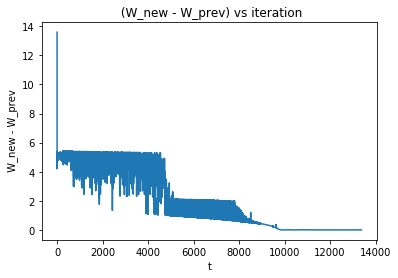

In [23]:
X, X_mean = X_fromImage(imgarr)
W = GHA(X)

Check also if we really got the principal components..

In [24]:
# Find 1st pc
C = np.cov(X)
eigu, eigv = np.linalg.eig(C) 
print (eigv[:,0].reshape((8,8))) # the 1st principal component (64,1)-> (8,8)

[[-0.10785216 -0.11655837 -0.12182441 -0.12374253 -0.12333106 -0.11924553
  -0.11133983 -0.10580333]
 [-0.11544395 -0.12425399 -0.12943767 -0.13171583 -0.13035394 -0.1254941
  -0.11769643 -0.11038282]
 [-0.11974345 -0.12886092 -0.13435566 -0.13650144 -0.13547842 -0.12912764
  -0.12014863 -0.11251387]
 [-0.12016581 -0.13023687 -0.13724226 -0.1394376  -0.13861675 -0.13235248
  -0.12332531 -0.1152166 ]
 [-0.11911099 -0.12928384 -0.13662164 -0.13978503 -0.13866261 -0.13308119
  -0.12538574 -0.11597431]
 [-0.11709203 -0.1270289  -0.13356147 -0.13708599 -0.13652637 -0.1318671
  -0.1248376  -0.11583194]
 [-0.11459658 -0.12386681 -0.12999203 -0.13252216 -0.13218699 -0.12818531
  -0.12173032 -0.113805  ]
 [-0.10987486 -0.11871458 -0.12382932 -0.12628096 -0.12610135 -0.12272
  -0.11635567 -0.10969256]]


In [25]:
print (W[:,0].reshape((8,8))) # this is the W1

[[-0.10785216 -0.11655837 -0.12182441 -0.12374253 -0.12333106 -0.11924553
  -0.11133983 -0.10580333]
 [-0.11544395 -0.12425399 -0.12943767 -0.13171583 -0.13035394 -0.1254941
  -0.11769643 -0.11038282]
 [-0.11974345 -0.12886092 -0.13435566 -0.13650144 -0.13547842 -0.12912764
  -0.12014863 -0.11251387]
 [-0.12016581 -0.13023687 -0.13724226 -0.1394376  -0.13861675 -0.13235248
  -0.12332531 -0.1152166 ]
 [-0.11911099 -0.12928384 -0.13662164 -0.13978503 -0.13866261 -0.13308119
  -0.12538574 -0.11597431]
 [-0.11709203 -0.1270289  -0.13356147 -0.13708599 -0.13652637 -0.1318671
  -0.1248376  -0.11583194]
 [-0.11459658 -0.12386681 -0.12999203 -0.13252216 -0.13218699 -0.12818531
  -0.12173032 -0.113805  ]
 [-0.10987486 -0.11871458 -0.12382932 -0.12628096 -0.12610135 -0.12272
  -0.11635567 -0.10969256]]


Notice how the $W_{1}$ - the $(64,1)$ weight matrix for the 1st output unit - is EXACTLY the same as the 1st principal component! Notice weights, converge either to $pc$ or $-pc$... If you check also the weights with lower eigenvalue, for example compare $eigv[:,7]$ and $w[:,7]$ you will notice an error of $~10^{-4}$.

We will call *mask*, each one of the $8$ (64,1) $W_{i}$, weight columns. Plot the masks, to visualize what information each mask extracts. For example the 1st mask -the most important mask, corresponding to the biggest eigenvalue-, checks for blobs. The 2nd mask -that is, the 2nd most important, in descending order-, checks for vertical edges , the 3rd for horizontal edges and so on.. 

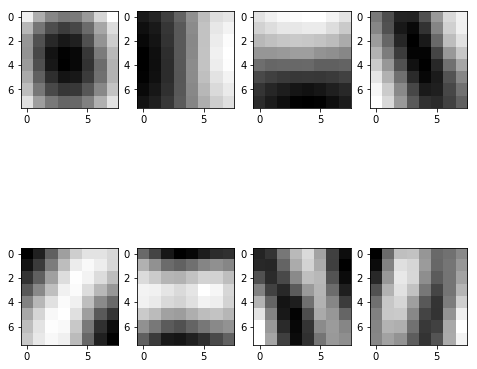

In [26]:
# plot the 8 (8,8) masks
fig = plt.figure(figsize=(8,8))
cols = 4
rows = 2

for i in range(1, cols*rows+1):
    fig.add_subplot(rows, cols, i)
    plt.imshow(W[:,i-1].reshape((8,8)), cmap='gray')
    
plt.show()

### 6.1.2. (Step.2.) Reconstruct the image

Now let's code each the image $I$. For each pixel $I_{nm}$, use its $(8,8)$ neighborhood $I_{n:n+8,m:m+8}$ , as input block for the network to get the respective $(8,1)$ coefficient $v_{nm}$ . That is : 

$$ v_{i,n,m} = w_{:,i}^T I_{n:n+8,m:m+8} $$ , for

- $m,n=0,7,15,23,..$ if blocks $I_{nm}$ non-overlapping, or
- $m,n = 1..256$, if $I_{nm}$ overlapping 
- and $i=1..8$

or in array-form

$$v_{n,m} = w^T I_{n:n+8, m:m+8}$$    

Each $(8,1)$ coefficient $v_{n,m}$, corresponds to the block $I_{n:n+8,m:m+8}$ with the left-up-most pixel being the $I_{n,m}$-pixel. It is the result of the filtering, of this block, with the masks $w_{:,i}$, $i=1..8$. There are $8$ such masks $w_{i}$ , each of shape $(64,1)$ or equivalently $(8,8)$, each. 

Then we will try to reconstruct the image: $\hat{I}$, the way that is described in the paper (the non-overlapping case). First quantize the coefficients: $v_{inm}$ -> $\hat{v_{inm}}$, according to the importance of each $i$-component. Then reconstruct the image $\hat{I}$ , by filtering the non-overlapping $(8,8)$ blocks, with the same weights $w$. There are $1024$ non-overlapping blocks in a $256x256$ image: $256/8 * 256/8 = 32*32 = 1024$ :

$$ \hat{I}_{n+p, m+q} = \sum_{i=1}^{8} {w_{p+8q, i} \hat{v}_{i,n,m}} $$

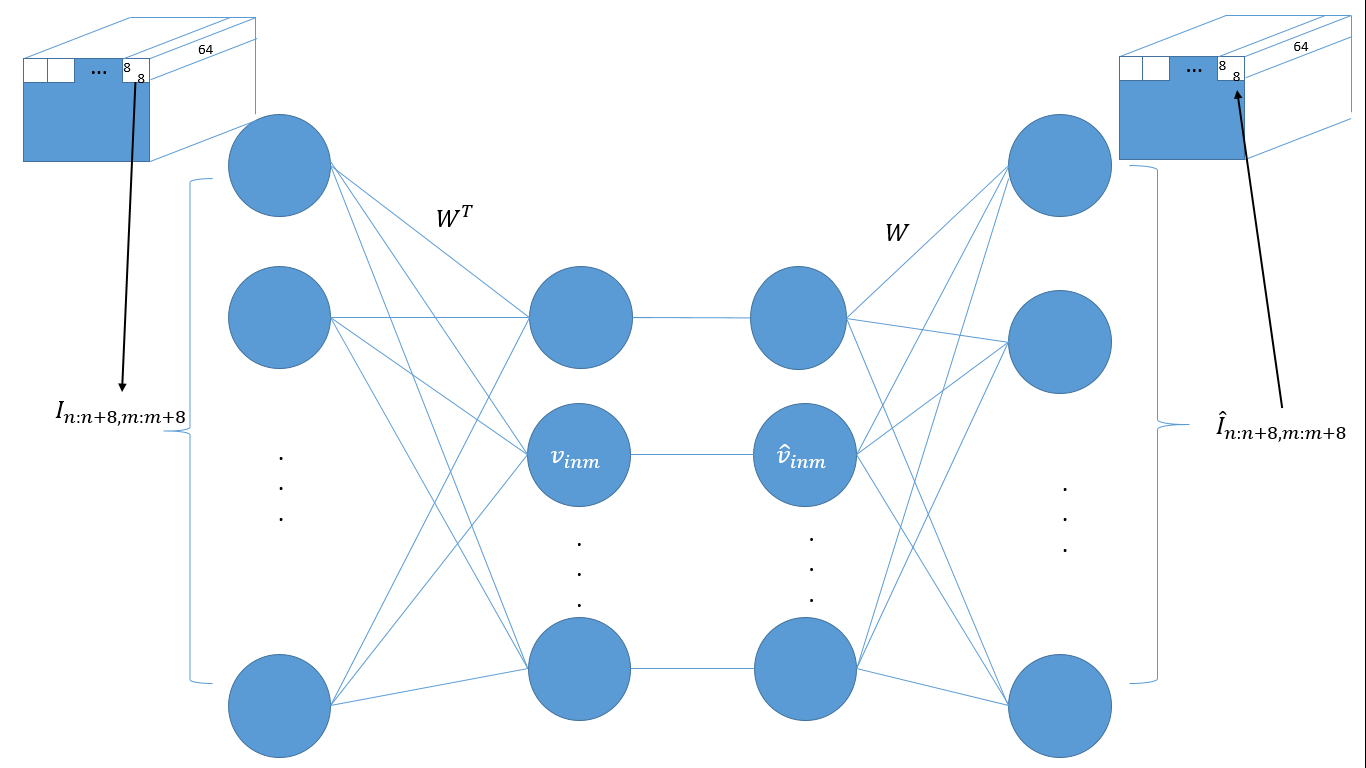

In [27]:
from IPython.display import Image
Image(filename='reconstruction1.png', width=600, height=600)

In [28]:
def reconstruct(X, X_mean, imgarr):

    # 1. calculate coefficients v_i : I -> X -> v_i
    # X is just what was calculated as input for the training, in GHA function, that is the 1024 blocks.
    X = X + X_mean.reshape((64,1)) # we need to recenter X, because we had made it zero-mean.
    coeffs = np.dot(W.T, X[:,:1024]) # 8,64 * 64,1024 -> 8,1024

    # Just to get a sense of the "variance-of-coefficients vs quantizing bits" relationship
    var = np.var(coeffs, axis=1)
    logvar = np.log(var)
    logbits = logvar / min(logvar)
    print('variance of coefficients v_i:\n', var, '\nnotice how var(v1) -attributed to mask W1- is bigger than var(v2), var(v2)>var(v3) and so on...')
    print('logbits:\n', logbits)

    # 2. Quantization of v_i : v_i -> v_hat_i
    # Well, Sanger in his paper chooses to "quantize" the first and second coefficients 
    # with 5 bits, the third with 3 bits, and 4th-up-to-8th coefficients with 2 bits.
    quantizing_bits = np.array([5, 5, 3, 2, 2, 2, 2, 2]) - [1] # -1, because the first bit is for the sign 

    quant_coeffs = []
    for i in range(coeffs.shape[0]):
        quantizing_bins_i = np.power(quantizing_bits[i], 2) 
        quantizing_step_i = 1. / quantizing_bins_i
        quant_coeffs.append(np.round(coeffs[i,:] / quantizing_step_i) * quantizing_step_i)

    quant_coeffs = np.hstack([quant_coeffs])
    print ('quantized coeffs shape is:', quant_coeffs.shape)
    print("sample of coefficients before quatnization: " , coeffs[:,:2])
    print("same sample after quatnization: ", quant_coeffs[:,:2])

    # 3. Reconstruct v_hat_i -> temp -> I_hat
    # 3.1. v_hat_i -> temp
    temp = np.dot(W, quant_coeffs) # 64,8 * 8,1024 -> 64,1024

    # create list of proper indexes (n,m), for the non-overlapping blocks 
    idx_list = [0]
    for i in range(256):
        if i%8==0 and i!=0:
            idx_list.append(i-1)     
    #print(idx_list)

    # 3.2. temp -> I_hat
    key = 0
    imgarr_hat = np.zeros((256,256))
    for n in idx_list:
        for m in idx_list:
            curr_temp = temp[:,key] # 64,1
            imgarr_hat[n:n+8, m:m+8] = curr_temp.reshape((8,8))
            key += 1
            
    # calculate NMSE
    NMSE = np.var(imgarr - imgarr_hat) / np.var(imgarr)
    print("NMSE: ", NMSE)

    # visualize the difference
    f = plt.figure()
    f.add_subplot(1,2,1)
    plt.imshow(imgarr_hat, cmap='gray')
    plt.title('I_hat')
    f.add_subplot(1,2,2)
    plt.imshow(imgarr, cmap='gray')
    plt.title('I')
    plt.show()
            
    return imgarr_hat

variance of coefficients v_i:
 [193501.29615285  31326.43214618  17300.18311275   7447.80945398
   6317.24102896   3706.07494364   2537.83619025   2259.87117628] 
notice how var(v1) -attributed to mask W1- is bigger than var(v2), var(v2)>var(v3) and so on...
logbits:
 [1.5761932  1.34042897 1.26354948 1.15442217 1.13310454 1.06405043
 1.01502047 1.        ]
quantized coeffs shape is: (8, 1024)
sample of coefficients before quatnization:  [[-2.18583693e+02 -2.19112129e+02]
 [ 6.17879743e-01 -1.07634870e+00]
 [ 9.81370261e+00  1.80887181e+01]
 [ 2.86999335e+01  8.83522361e+00]
 [ 4.34914128e-01 -6.01893545e+00]
 [-5.41268043e+00 -2.10448728e+00]
 [ 2.16366917e+01 -9.67418110e-02]
 [-2.41091005e+00  2.20288495e+00]]
same sample after quatnization:  [[-218.5625 -219.125 ]
 [   0.625    -1.0625]
 [   9.75     18.    ]
 [  29.        9.    ]
 [   0.       -6.    ]
 [  -5.       -2.    ]
 [  22.       -0.    ]
 [  -2.        2.    ]]
NMSE:  0.16659697443063035


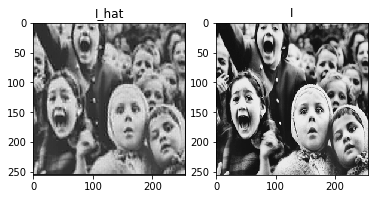

In [29]:
imgarr_hat = reconstruct(X, X_mean, imgarr)

In [30]:
print(imgarr[50:55,50:55])
print(imgarr_hat[50:55,50:55])

[[26 26 26 26 26]
 [26 26 27 26 26]
 [26 26 26 26 26]
 [26 26 25 25 26]
 [26 26 25 25 26]]
[[25.08553036 24.63376763 25.09196065 25.3971109  25.28690606]
 [25.35070056 24.95380745 25.32473028 25.60655056 25.16186167]
 [25.39504537 25.51311732 25.89787785 25.92823105 25.22801886]
 [25.71717535 26.2731762  26.66375904 26.300191   25.23521158]
 [25.62383414 26.40571977 26.7517843  26.05607796 24.95110702]]


#### In step 2, we used the weights that were trained on non-ovelapping $(8,8)$ blocks  of the image, and we reconstructed respectively. Would the reconstruction work, if we used those weights on overlapping blocks, to reconstruct the image ?

For fun, we will try also the overlapping case. In the overlapping case, we will try to reconstruct the image, by filtering overlapping blocks, with weights that have been trained on non-overlapping blocks. We end up with as many blocks as the pixels - in this $256x256$ image, there are $256*256=65536$. We use $stride=1$ and we pad the image ,with zeros, as we move to the right-most edges, when there are less than 7 pixels to the right of (or below) the $I_{n,m}$ pixel, so that the block is still $(8,8)$.  

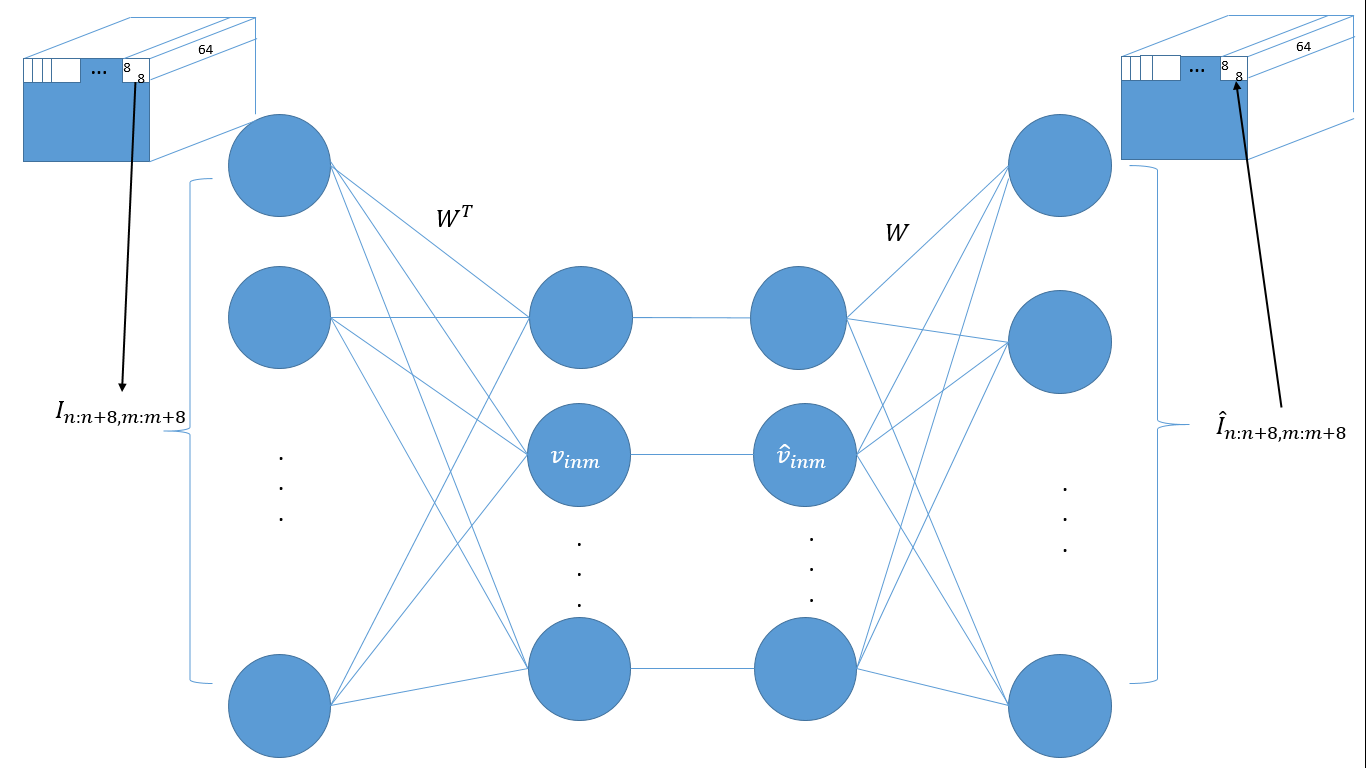

In [31]:
Image(filename='reconstruction2.png', width=600, height=600)

In [32]:
def reconstruct_overlap(imgarr):
    # 1. Apply the 8 masks on each 8x8 block of the 256x256 image array
    # to produce 8 coefficients for each one of those 65536 blocks.
    coeffs = []
    for n in range(256): # when convoluting we move along the rows first!!!
        for m in range(256):
            if n <= 248 and m <= 248:
                block = imgarr[n:n+8, m:m+8].reshape((64,1))
            else:
                padding = np.zeros((8,8))
                padding[:min(8,256-n), :min(8,256-m)] = imgarr[n:n+min(8,256-n), m:m+min(8,256-m)]
                block = padding.copy().reshape((64,1))
            coeffs.append(np.dot(W.T, block)) # 8,64 * 64,1 -> 8,1

    # horizontally stack the 256*256 (8,1) arrays into an (8,65536) array  
    coeffs = np.hstack(coeffs)
    #print(coeffs.shape)

    # Just to get a sense of the "variance-of-coefficients vs quantizing bits" relationship
    var = np.var(coeffs, axis=1)
    logvar = np.log(var)
    logbits = logvar / min(logvar)
    print('variance of coefficients v_i:\n', var, '\nnotice how var(v1) -attributed to mask W1- is bigger than var(v2), var(v2)>var(v3) and so on...')
    print('logbits:\n', logbits)

    # 2. quantize
    # Well, Sanger in his paper chooses to "quantize" the first and second coefficients 
    # with 5 bits, the third with 3 bits, and 4th-up-to-8th coefficients with 2 bits.
    quantizing_bits = np.array([5, 5, 3, 2, 2, 2, 2, 2]) - [1] # -1, because the first bit is for the sign 

    quant_coeffs = []
    for i in range(coeffs.shape[0]):
        quantizing_bins_i = np.power(quantizing_bits[i], 2) 
        quantizing_step_i = 1. / quantizing_bins_i
        quant_coeffs.append(np.round(coeffs[i,:] / quantizing_step_i) * quantizing_step_i)

    quant_coeffs = np.hstack([quant_coeffs])
    #print ('quantized coeffs shape is:', quant_coeffs.shape)
    print("sample of coefficients before quatnization: " , coeffs[:,:2])
    print("same sample after quatnization: ", quant_coeffs[:,:2])


    # 3. Reconstruct
    blocks = np.dot(W, quant_coeffs) # 64,8 * 8,65536 -> 64, 65536 
    blocks = blocks.reshape((64,256,256))
    imgarr_hat_new = np.zeros((256,256))

    for n in range(256):
        for m in range(256):
            curr_block = blocks[:,n,m].reshape((8,8))
            imgarr_hat_new[n:min(n+8,256), m:min(m+8,256)] += curr_block[:min(8,256-n), :min(8,256-m)]
            
    # this is huge because we reconstruct with overlapping blocks 
    NMSE = np.var(imgarr-imgarr_hat_new) / np.var(imgarr)

    # need for normalization s.t. pixel values are in [0 .. 1]
    imgarr_norm = imgarr / np.max(imgarr)
    imgarr_hat_norm = imgarr_hat_new / np.max(imgarr_hat_new)
    NMSE_norm = np.var(imgarr_norm - imgarr_hat_norm) / np.var(imgarr_norm)
    print("NMSE normalized: ", NMSE_norm)
    print("NMSE", NMSE)

    # visualize the difference - however the overall result is worth!
    f = plt.figure()
    f.add_subplot(1,2,1)
    plt.imshow(imgarr_hat, cmap='gray')
    plt.title('I_hat')
    f.add_subplot(1,2,2)
    plt.imshow(imgarr, cmap='gray')
    plt.title('I')
    plt.show()
            
    return imgarr_hat_new

variance of coefficients v_i:
 [198797.22251902  32010.64139341  20910.99769486   7648.76179204
   6424.32627798   4248.96680703   2727.19765581   2418.62743896] 
notice how var(v1) -attributed to mask W1- is bigger than var(v2), var(v2)>var(v3) and so on...
logbits:
 [1.56592354 1.33152136 1.27686912 1.14777951 1.1253879  1.07232433
 1.01541202 1.        ]
sample of coefficients before quatnization:  [[-218.58369308 -213.80397125]
 [   0.61787974    9.3451952 ]
 [   9.81370261   17.08766373]
 [  28.69993352   10.5603653 ]
 [   0.43491413   -1.83427935]
 [  -5.41268043   -3.94075636]
 [  21.63669167    8.27883338]
 [  -2.41091005    3.14121945]]
same sample after quatnization:  [[-218.5625 -213.8125]
 [   0.625     9.375 ]
 [   9.75     17.    ]
 [  29.       11.    ]
 [   0.       -2.    ]
 [  -5.       -4.    ]
 [  22.        8.    ]
 [  -2.        3.    ]]
NMSE normalized:  0.08971728784996758
NMSE 3778.7467814255683


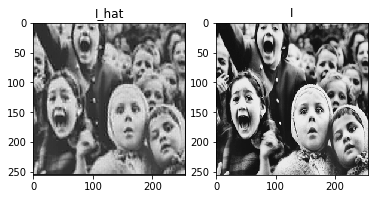

In [33]:
imgarr_hat_new = reconstruct_overlap(imgarr)

Notice the huge reconstruction error :
- huge difference between the absolute pixel values of $I$ and $\hat{I}$ (below) 
- NMSE is huge (above).

But also notice that the information in the manifold of the image is very well preserved (NMSE of normalized values is low) (above). 

In [34]:
print(imgarr[:,100:110])
print(imgarr_hat_new[:,100:110])

[[ 57  83 106 ... 126 130 100]
 [ 69 104 148 ... 199 200 163]
 [102  94 123 ... 192 191 176]
 ...
 [190 186 189 ... 193 181 181]
 [183 177 184 ... 184 165 173]
 [178 175 180 ... 175 153 180]]
[[  475.74261201   621.8852136    830.91750995 ...  1235.77924418
   1147.85191935   898.19959989]
 [ 1369.51471635  1591.47171838  1966.89047231 ...  2971.76429272
   2785.92224797  2204.68535911]
 [ 2677.47592376  2797.19884688  3133.50504574 ...  4696.93913934
   4473.41955521  3592.74562226]
 ...
 [12404.67616347 12453.17894181 12474.8882805  ... 12286.02765352
  11918.13910939 11648.5751027 ]
 [10789.36463043 10880.15152017 10929.23404747 ... 10764.78224658
  10444.22141287 10250.85395309]
 [ 7782.73290619  7878.05183523  7925.76274001 ...  7799.49463231
   7564.2218058   7468.14115203]]


#### Reconstruction-conclusion.

Not bad, if we consider that... 
- ...we did all this by using *only the 8 first principal components*, 
- ...and also, after having them *quantized*, in the sense that we reduced the bit-to-pixel ratio from $1:1$ to $23:64=.36$ bits/pixel, thus, reducing the information to pixel ratio.

#### Explain qantization : *bits:pixel=.36*

1st principal component -> 5 bits, 2nd -> 5 bits, 3rd -> 3bits, 4th-8th -> 2 bits.<p>
That is overally $5+5+3+2+2+2+2 = 23bits$, for each $(8,1)$ coefficient $v_{n,m}$, where $n,m=1..256$.<P>

We know that
- each coefficient $v_{i,n,m}$ , with $i=1..8$ corresponds to 
- a $(8,8)$ block $I_{n:n+8,m:m+8}$, that is $64$ pixels
- and each coefficient is hardcoded with $23$ bits.

Therefore the $bit:pixel$ ratio for each coefficient $v_{i,n,m}$ is $23:64 = .36$.

### 6.1.3. We will use the weights that were trained on the previous image, to see if they could be used here, to encode and decode-reconstruct the dog image.

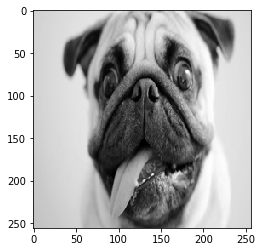

In [35]:
from PIL import Image
dog = Image.open('dogimg.jpg').convert('L') # open and convert to greycale
dog = dog.resize((256, 256), Image.ANTIALIAS) # resize into 256x256
plt.imshow(dog, cmap='gray') # show
plt.show()

dogarr = np.asarray(dog) # read image into array

variance of coefficients v_i:
 [315738.52024847  13560.38561246   5638.08272948   2506.97034038
   1979.87243096    763.28935325    759.75163748    639.36492205] 
notice how var(v1) -attributed to mask W1- is bigger than var(v2), var(v2)>var(v3) and so on...
logbits:
 [1.96002135 1.4727876  1.33694486 1.21149448 1.17495807 1.02742241
 1.02670333 1.        ]
quantized coeffs shape is: (8, 1024)
sample of coefficients before quatnization:  [[-1634.57476    -1657.15653415]
 [   32.89921626    32.53260459]
 [    8.41844018     8.41842335]
 [   85.35866999    86.40901544]
 [  -56.58468339   -56.9532999 ]
 [  -38.59815813   -39.79645675]
 [    4.12257279     3.57225849]
 [   -6.24403355    -6.43817234]]
same sample after quatnization:  [[-1634.5625 -1657.1875]
 [   32.875     32.5625]
 [    8.5        8.5   ]
 [   85.        86.    ]
 [  -57.       -57.    ]
 [  -39.       -40.    ]
 [    4.         4.    ]
 [   -6.        -6.    ]]
NMSE:  0.08858816583940726


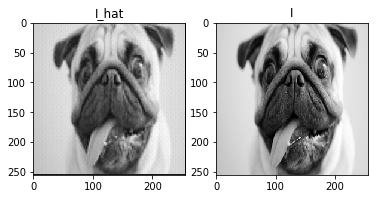

In [36]:
X_dog, X_dog_mean = X_fromImage(dogarr)
dog_hat = reconstruct(X_dog, X_dog_mean, dogarr)

We can safely assume, that the weights that were trained on the 'eisenhadt' image, extract features that are universal (blobs, edges of various orientations ...). No matter what the image we train them on, the features-weights that will be extracted are universal. We can use this hebbian network to encode and decode any image! A wild guess would be to say that the visual cortex works the same way! 

### 6.2. Texture segmentation

Next we'll see, how training on an image that has different texture on different areas, the features extracted, tend to resemble these textures. Here we try an image with horizontal texture on the left and vertical texture on the right side.

In [37]:
# Import libraries
from scipy.ndimage import gaussian_filter
import cv2

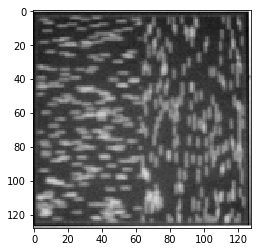

In [38]:
from PIL import Image
img_texture = Image.open('texture.jpg').convert('L') # open and converto to greycale
img_texture = img_texture.resize((128, 128), Image.ANTIALIAS) # resize into 128x128
img_texturearr = np.asarray(img_texture) # save to array
plt.imshow(img_texturearr, cmap='gray')
plt.show()

Before showing each training data block $(8,8)$, we will pass ot through a gaussian window, to focus the learning on the central area of the blocks.  

In [39]:
# Define some gaussian kernels for "windows", to be applied to each (8,8) block,
# before training the weights.
import scipy.stats as st
from scipy.stats import norm

def gkern_1(kernlen=8, nsig=2):
    # kernel is (8,8)
    # sigma = 2
    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x, loc=0, scale=1))
    #x = np.linspace(-1, 1, kernlen+1)
    #kern1d = np.diff(st.norm.cdf(x, loc=0, scale=nsig))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    #kernel = kernel/np.max(kernel)
    return kernel

def gkern_2(size=8):
    x, y = np.mgrid[-size/2:size/2, -size/2:size/2]
    g = np.exp(-(x**2/float(size)+y**2/float(size)))
    return g / g.sum()

def gkern_3(size, s, stdToPixel_ratio): 
    """
    This one is mine. I wanted to create a gaussian kernel
    , that gets as input the desired pixel-to-std ratio.
    In the paper, it is often used as an expression the following
    'We low-pass filter with a gaussian with standard deviation 1/2/4 pixels'.
    So here, a ratio of 5, means that moving 1 pixel away from the center,
    makes the value of this pixel lower, as the probability of getting
    there, is pdf(5*sigma). Similarly, getting 2 pixels away, makes the
    value of the new pixel even lower ; pdf(2*5*sigma). The value of the 
    central pixel is pdf(0*sigma). See that pdf(0)>pdf(5*sigma)>pdf(10*sigma).
    
    Inputs:
    - size ; size of the square kernel
    - s ; sigma (std)
    - stdToPixel_ratio ; 1 -> 1pixel = 1std, 
                        1/5 -> 1pixel = 1/5std
                        5 -> 1pixel = 5std
    """
    if size % 2 != 0:
        ind = np.round((size-1)/2)
        x = np.arange(-ind , ind+1) # ex. x = [-3, -2, -1, 0, 1, 2, 3]
    else:
        half1 = np.arange(-size/2, 0)
        half2 = -half1[::-1]
        x = np.concatenate((half1, half2)) # ex.x = [-2, -1, 1, 2]
    kern1d = st.norm.pdf((x*s)*stdToPixel_ratio, loc=0, scale=s)
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    # if you want to visualize the kernel un-comment.
    #print(kernel)
    #plt.plot(x*s, kern1d)
    #plt.matshow(kernel)
    #plt.show()
    
    return kernel

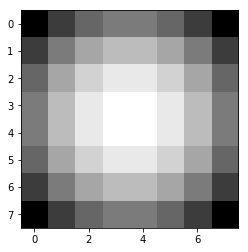

[[0.01433668 0.01487033 0.01523709 0.01542384 0.01542384 0.01523709
  0.01487033 0.01433668]
 [0.01487033 0.01542384 0.01580425 0.01599796 0.01599796 0.01580425
  0.01542384 0.01487033]
 [0.01523709 0.01580425 0.01619404 0.01639253 0.01639253 0.01619404
  0.01580425 0.01523709]
 [0.01542384 0.01599796 0.01639253 0.01659345 0.01659345 0.01639253
  0.01599796 0.01542384]
 [0.01542384 0.01599796 0.01639253 0.01659345 0.01659345 0.01639253
  0.01599796 0.01542384]
 [0.01523709 0.01580425 0.01619404 0.01639253 0.01639253 0.01619404
  0.01580425 0.01523709]
 [0.01487033 0.01542384 0.01580425 0.01599796 0.01599796 0.01580425
  0.01542384 0.01487033]
 [0.01433668 0.01487033 0.01523709 0.01542384 0.01542384 0.01523709
  0.01487033 0.01433668]]


In [40]:
# the gaussian window i'll use.
kern = gkern_1(8,.5)
plt.imshow(kern, cmap='gray')
plt.show()
print(kern)

In [41]:
def X_fromImage_overlap(imgarr):
    """
    Create ~1000 overlapping blocks of 128x128 image array 'imgarr'
    """
        
    # Sample 31*31=961 overlapping (8,8)or(64,1) blocks on the image-array.
    # That is to create the X (input) array (8,8,961)or(64,961).
    # We will sample with stride=4 and padding=0.
    # i,j refer to the central pixel of the block I(ij).
    X = np.empty((64,1))
    indxs = np.arange(4,128,4) # stride=4
    for i in indxs: # length=31: [4,8,12,..,124]
        for j in indxs: # [4,8,..124]
            block_gauss = imgarr[i-4:i+4, j-4:j+4] * gkern_1(8,2) # (8,8): gaussian window to center the learning
            X = np.hstack((X, block_gauss.reshape(64,1)))
    
    # Get rid of the first empty column.
    X = X[:,1:] # (64,961)
    
    # Make X zero-mean, for each one of the 64 features (row-wise).
    X = X - np.mean(X, axis=1).reshape((X.shape[0],1))
    
    return X

In [42]:
def GHA_texture(X, learning_rate = 0.1, threshold = 1e-8, num_outputs = 4):
    
    # Declare the parameters of the input.
    num_inputs = X.shape[0] # 64
    num_samples = X.shape[1] # 961
    
    # Intialize (64,8) weights and time t.
    W = np.random.normal(scale=.5, size=(num_inputs, num_outputs))
    W_prev = np.random.normal(scale=.25, size=(num_inputs, num_outputs))
    difference_trace = []
    t_trace = []
    t = 0
    
    # update rule
    while np.linalg.norm(W - W_prev) > threshold: # works with 64,8
        t += 1.0
        W_prev = W.copy()
        Y = np.dot(W.T, X) # 4,64 * 64, 961 -> 4,961
        XYT = np.dot((1/(num_samples-1))*X, Y.T) # 64,961 * 961,4 -> 64,4
        LT = np.tril(np.dot((1/(num_samples-1))*Y, Y.T)) # 4,961 * 961,4 -> 4,4
        dW = XYT - np.dot(W, LT.T) # 64,4 - 64,4 * 4,4 -> 64,4
        W += learning_rate * dW # notice here we REMOVED the time t denominator..
        W /= np.linalg.norm(W, axis=0)
        # keep track of W-W_prev evolution
        difference_trace.append(np.linalg.norm(W - W_prev))
        t_trace.append(t)
        #print (np.linalg.norm(W - W_prev))
   
    plt.plot(t_trace, difference_trace)
    plt.xlabel('t')
    plt.ylabel(' W_new - W_prev')
    plt.title(' (W_new - W_prev) vs iteration')
    plt.show()

    return W

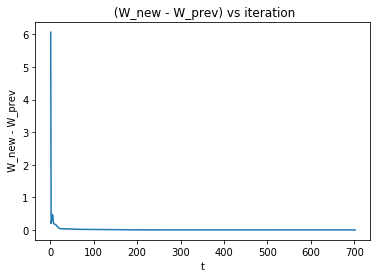

In [43]:
X_text = X_fromImage_overlap(img_texturearr)
W_texture = GHA_texture(X_text)

Plot and notice the first mask is a low-pass filter, the second and the third are edge detectors, and the fourth is a horizontal bar detector (Laplacian).

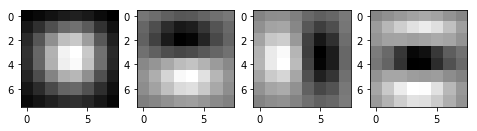

In [44]:
# plot the 4 (8,8) masks
fig = plt.figure(figsize=(8,8))
cols = 4
rows = 1

for i in range(1, cols*rows+1):
    fig.add_subplot(rows, cols, i)
    plt.imshow(W_texture[:,i-1].reshape((8,8)), cmap='gray')
    
plt.show()

We next convolve each  of  the  masks with  the  original image to show which regions of the image give high response for each mask. I think its alerady clear that convolution of the original image with each mask, gives large response for different  textures (1st: everywhere almost the same response, 2nd: horizontal edges (left), 3rd: vertical edges (right), 4th: horizontal bars (left)).

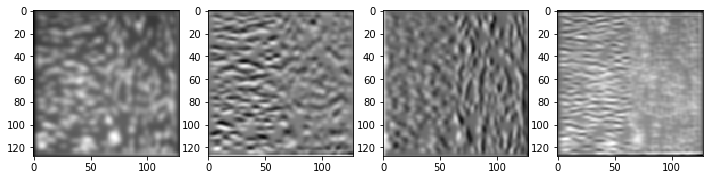

In [45]:
from scipy import signal

# Convolve each mask, with the whole image
conv = []
for i in range(W_texture.shape[1]): # 1..4
    mask = (W_texture[:,i].reshape((8,8))) # define the mask
    conv.append(signal.convolve2d(img_texturearr, mask, 'same')) # convolve (128,128) image with (8,8) mask
    
# plot the convolutions
fig = plt.figure(figsize=(12,12))    
for i in range(1,len(conv)+1):
    fig.add_subplot(1, 4, i)
    plt.imshow(conv[i-1], cmap='gray')

plt.show()

However, the author tries to accentuate visualization of the responses, by doing the following (i don't think it's necessary, it only accentuates the response concerning the second mask and maybe the 4th mask).

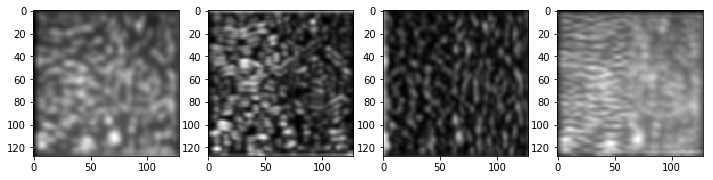

In [46]:
# full wave rectify the convolutions
conv_rect = np.abs(conv)

# low-pass filter the rectified convolutions
convgauss = []
for i in range(len(conv)):
    convgauss.append(cv2.GaussianBlur(conv_rect[i],(5,5), 2))

# plot the rectified-filtered convolutions
fig = plt.figure(figsize=(12,12))    
for i in range(1,len(conv)+1):
    fig.add_subplot(1, 4, i)
    plt.imshow(convgauss[i-1], cmap='gray')

plt.show()

### 3. Receptive fields

In [47]:
# Generate gaussian filtered - gaussian white noise images
def white_noise_image(size=64):
    
    # white noise image
    noisy = norm.rvs(loc=0, scale=1, size=size*size).reshape((size,size)) #  zero-mean white-noise image
    #noisy = np.random.normal(0, 1, (64,64))
    #noisy = 256*np.random.rand(64,64)
    
    # gaussian-filtered
    noisy = cv2.GaussianBlur(noisy, (19,19),3) 
    
    # gaussian-windowed
    #noisy = noisy * gkern_1(64,3) 
    #window = gkern_1(64,3)
    #noisy = noisy * (window/np.max(window))
    return noisy

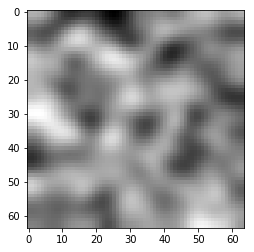

(4096, 2000)


In [48]:
# Construct the 2000 examples-training set, of (64,64) white noise images.
x_noise = []
for i in range(2000):
    x_noise.append(white_noise_image().reshape((64*64,1)))
    
x_noise = np.hstack(x_noise)

plt.imshow(x_noise[:,10].reshape((64,64)), cmap='gray')
plt.show()
print (x_noise.shape)

In [49]:
# if you run this you will see how long it takes, because of the 1096-dimensional input..
# C = np.cov(img_rf)
#eigu, eigv = np.linalg.eig(C) 
#plt.imshow((eigv[:,0].reshape((64,64))))
#plt.show()
#eigv[:,0]

In [50]:
def GHA_rf(X, learning_rate = .01, threshold = 1e-8, num_outputs = 16):
    
    # Declare the parameters of the input.
    num_inputs = X.shape[0] # 4096
    num_samples = X.shape[1] # 2000
    
    # Intialize (4096,16) weights and time t.
    W = np.random.normal(scale=.5, size=(num_inputs,num_outputs))
    W_prev = np.random.normal(scale=.25, size=(num_inputs, num_outputs))
    difference_trace = []
    t_trace = []
    t = 0
    
    while np.linalg.norm(W - W_prev) > 1e-5: # I HAVE CHANGED THRESH 
        t += 1.0
        W_prev = W.copy()
        Y = np.dot(W.T, X) # 4,64 * 64, 961 -> 4,961
        XYT = np.dot((1/(num_samples-1))*X, Y.T) # 64,961 * 961,4 -> 64,4
        LT = np.tril(np.dot((1/(num_samples-1))*Y, Y.T)) # 4,961 * 961,4 -> 4,4
        dW = XYT - np.dot(W, LT.T) # 64,4 - 64,4 * 4,4 -> 64,4
        W += (learning_rate/t) * dW
        W /= np.linalg.norm(W, axis=0)
        # keep track of W-W_prev evolution
        difference_trace.append(np.linalg.norm(W - W_prev))
        t_trace.append(t)
        #print (np.linalg.norm(W - W_prev))
    
    plt.plot(t_trace, difference_trace)
    plt.xlabel('t')
    plt.ylabel(' W_new - W_prev')
    plt.title(' (W_new - W_prev) vs iteration')
    plt.show()

    return W

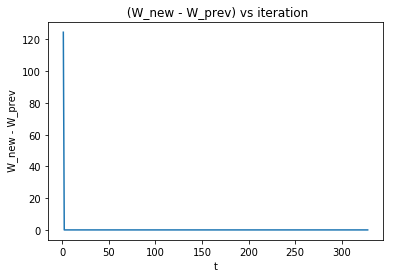

In [51]:
W_rf = GHA_rf(x_noise)

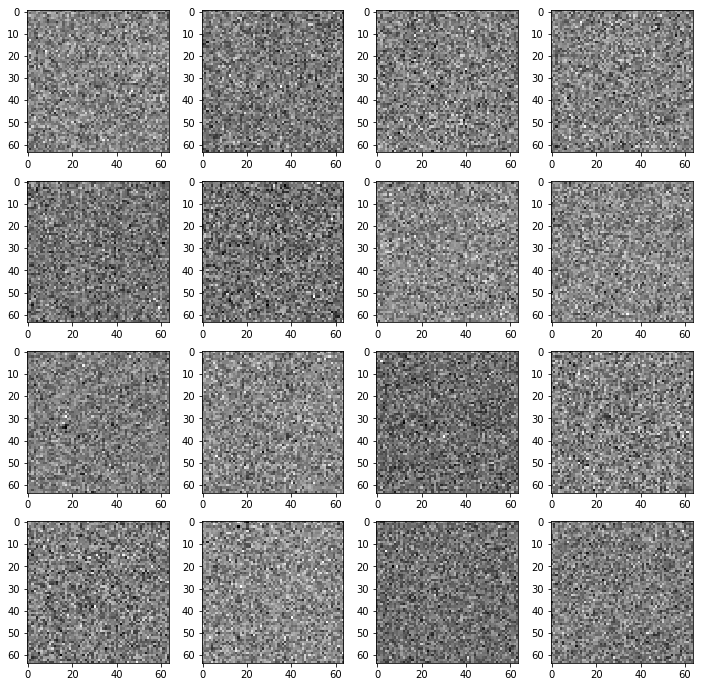

In [52]:
# plot the 16 (64,64) masks
fig = plt.figure(figsize=(12,12))
cols = 4
rows = 4

for i in range(1, cols*rows+1):
    fig.add_subplot(rows, cols, i)
    plt.imshow(W_rf[:,i-1].reshape((64,64)), cmap='gray')
    
plt.show()

Unfortunately i couldn't converge to the receptive fields on white-noise images.. Don't know what exact filter Sanger used..

### References.

[1] Optimal Unsupervised Learning in a Single-Layer Linear Feedforward Neural Network, T. Sanger

[2] Introduction to the theory of neural computation, Hertz,Krogh,Palmer, Santa Fe Institute, CRC Press p.197-210